<a href="https://colab.research.google.com/github/JackTheProgrammer/Working-with-Text-Classification/blob/main/NN_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing and checking libraries

In [ ]:
pip install torch

  Using cached torch-2.5.1-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
Using cached torch-2.5.1-cp311-cp311-manylinux1_x86_64.whl (906.5 MB)


In [ ]:
pip show torch transformers

Name: torch
Version: 2.5.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision
---
Name: transformers
Version: 4.47.1
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/gra

In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


# Emotion classification based on comments
You can get the dataset [here](https://www.kaggle.com/datasets/abdallahwagih/emotion-dataset)

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
from warnings import filterwarnings
from transformers import BertModel, BertTokenizer

filterwarnings('ignore')

In [ ]:
# Example tensor with shape (1, 3, 1, 4)
x = torch.randn(1, 3, 1, 4)
print("Original shape:", x.shape)  # (1, 3, 1, 4)

# Squeezing the tensor
x_squeezed = x.squeeze()
print("Squeezed shape:", x_squeezed.shape)  # (3, 4)

Original shape: torch.Size([1, 3, 1, 4])
Squeezed shape: torch.Size([3, 4])


In [ ]:
torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device(type='cpu')

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/Emotion_classify_Data.csv')
df

Comment Emotion
0     i seriously hate one subject to death but now ...    fear
1                    im so full of life i feel appalled   anger
2     i sit here to write i start to dig out my feel...    fear
3     ive been really angry with r and i feel like a...     joy
4     i feel suspicious if there is no one outside l...    fear
...                                                 ...     ...
5932                 i begun to feel distressed for you    fear
5933  i left feeling annoyed and angry thinking that...   anger
5934  i were to ever get married i d have everything...     joy
5935  i feel reluctant in applying there because i w...    fear
5936  i just wanted to apologize to you because i fe...   anger

[5937 rows x 2 columns]

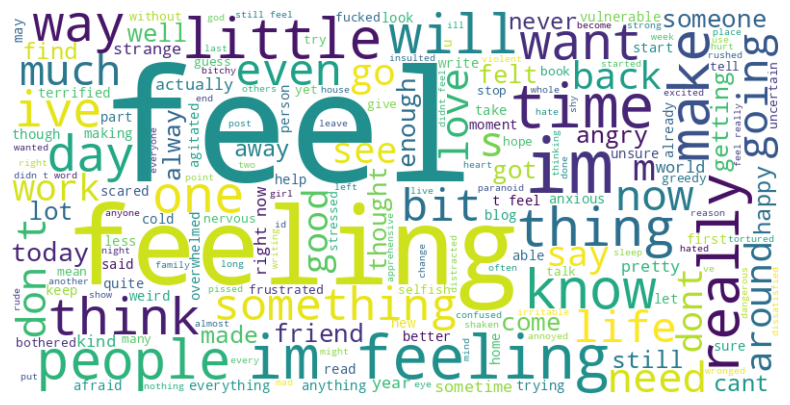

In [ ]:
# prompt: Using dataframe df: word cloud

# import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all comments into a single string
text = " ".join(df['Comment'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

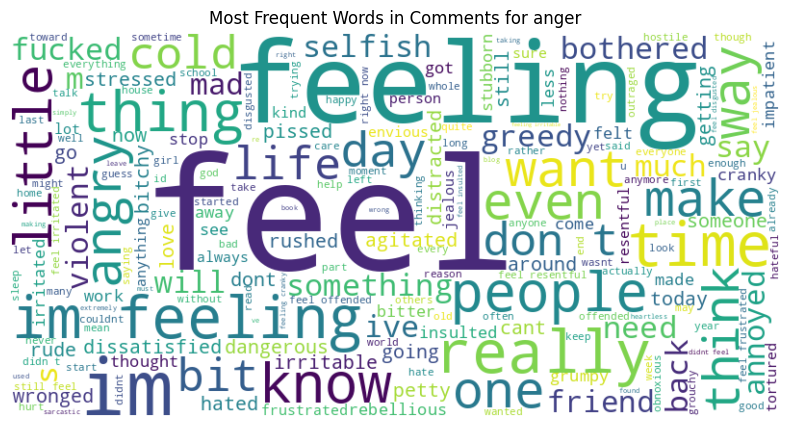

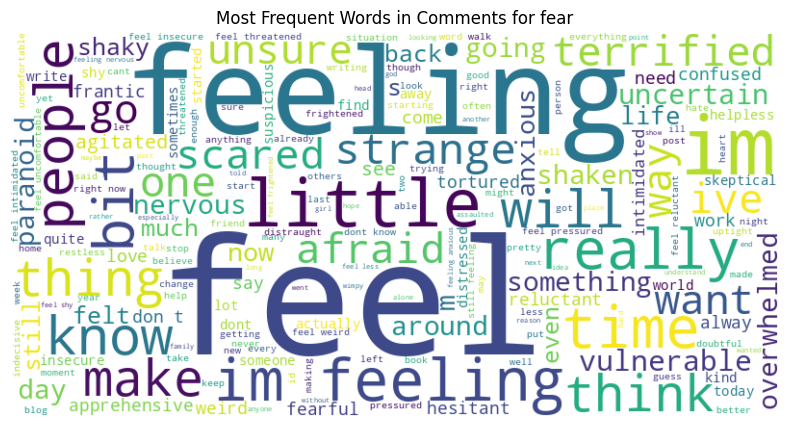

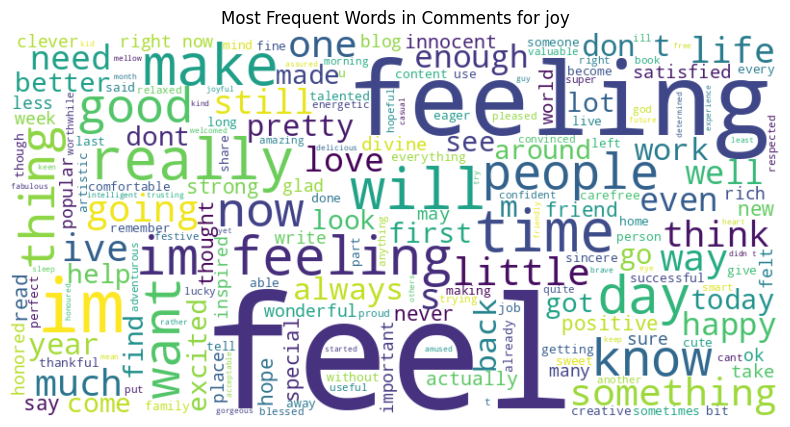

In [ ]:
# prompt: using this `df` generate a visualization of most used words in comments per emotion.

# Group the DataFrame by emotion
emotion_groups = df.groupby('Emotion')

# Function to generate and display word clouds for each emotion
def plot_wordcloud_per_emotion(emotion_group):
    emotion = emotion_group[0]
    comments = " ".join(emotion_group[1]['Comment'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Frequent Words in Comments for {emotion}')  # Add title
    plt.axis("off")
    plt.show()

# Iterate through each emotion group and plot the wordcloud
for emotion_group in emotion_groups:
    plot_wordcloud_per_emotion(emotion_group)

In [ ]:
# prompt: Use this `df` to acquire corpus of all of the most used words in comments per emotion.

from collections import Counter

def get_top_n_words(text, n=10):
  """Gets the top n most frequent words from a text string."""
  words = text.lower().split()
  word_counts = Counter(words)
  return word_counts.most_common(n)

# Group the DataFrame by emotion
emotion_groups = df.groupby('Emotion')

# Iterate through each emotion group and get the top words
for emotion, group in emotion_groups:
    comments = " ".join(group['Comment'].astype(str))
    top_words = get_top_n_words(comments, n=20) # Get top 20 words
    print(f"Top 20 words for emotion '{emotion}':")
    for word, count in top_words:
        print(f"  - {word}: {count}")
    print("-" * 20)

Top 20 words for emotion 'anger':
  - i: 3317
  - feel: 1355
  - and: 1164
  - to: 1078
  - the: 1018
  - a: 723
  - feeling: 669
  - that: 652
  - of: 579
  - my: 528
  - it: 409
  - in: 380
  - like: 355
  - im: 321
  - so: 321
  - me: 319
  - with: 307
  - was: 305
  - but: 298
  - for: 284
--------------------
Top 20 words for emotion 'fear':
  - i: 3083
  - feel: 1212
  - to: 1116
  - and: 1110
  - the: 1000
  - a: 806
  - feeling: 742
  - of: 614
  - that: 531
  - my: 525
  - in: 399
  - it: 377
  - about: 334
  - im: 322
  - was: 306
  - but: 293
  - so: 286
  - am: 275
  - me: 272
  - like: 258
--------------------
Top 20 words for emotion 'joy':
  - i: 3224
  - feel: 1480
  - and: 1249
  - to: 1230
  - the: 1153
  - a: 790
  - that: 680
  - of: 617
  - feeling: 553
  - in: 526
  - my: 486
  - like: 379
  - it: 376
  - so: 323
  - for: 311
  - me: 306
  - have: 303
  - im: 300
  - am: 289
  - is: 278
--------------------


In [ ]:
class EmotionDataset(Dataset):
  def __init__(self, df):
    self.corpus = df['Comment']
    self.labels = df['label']

  def __len__(self):
    return len(self.corpus)

  def __getitem__(self, index):
    return {
        'corpus': self.corpus[index],
        'label': self.labels[index]
    }

In [ ]:
emotion2label = {emotion:label for label, emotion in enumerate(df['Emotion'].unique())}
emotion2label

{'fear': 0, 'anger': 1, 'joy': 2}

In [ ]:
label2emotion = {label:emotion for emotion, label in emotion2label.items()}
label2emotion

{0: 'fear', 1: 'anger', 2: 'joy'}

In [ ]:
df['label'] = df['Emotion'].map(emotion2label)
df

Comment Emotion  label
0     i seriously hate one subject to death but now ...    fear      0
1                    im so full of life i feel appalled   anger      1
2     i sit here to write i start to dig out my feel...    fear      0
3     ive been really angry with r and i feel like a...     joy      2
4     i feel suspicious if there is no one outside l...    fear      0
...                                                 ...     ...    ...
5932                 i begun to feel distressed for you    fear      0
5933  i left feeling annoyed and angry thinking that...   anger      1
5934  i were to ever get married i d have everything...     joy      2
5935  i feel reluctant in applying there because i w...    fear      0
5936  i just wanted to apologize to you because i fe...   anger      1

[5937 rows x 3 columns]

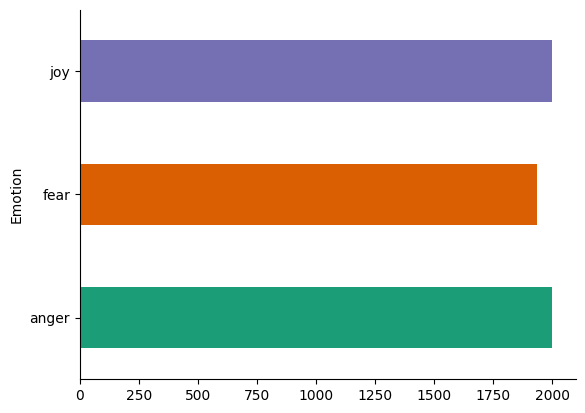

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
train_df

Comment Emotion  label
0     i seriously hate one subject to death but now ...    fear      0
1                    im so full of life i feel appalled   anger      1
2     i sit here to write i start to dig out my feel...    fear      0
3     ive been really angry with r and i feel like a...     joy      2
4     i feel suspicious if there is no one outside l...    fear      0
...                                                 ...     ...    ...
4744                                          at school   anger      1
4745  i like this so much but i feel like somehow th...     joy      2
4746  ive heard it so many times already im already ...    fear      0
4747  im thankful for it and the parents because the...    fear      0
4748  i feel so paranoid and im really gonna cut dow...    fear      0

[4749 rows x 3 columns]

In [ ]:
test_df

Comment Emotion  label
4749  i sing as one who feels contented with a comfo...     joy      2
4750  i was feeling playful so i danced around the p...     joy      2
4751  i feel like i have been a little distracted la...   anger      1
4752       i just cant help it from feeling so insecure    fear      0
4753      i was feeling adventurous and took the stairs     joy      2
...                                                 ...     ...    ...
5932                 i begun to feel distressed for you    fear      0
5933  i left feeling annoyed and angry thinking that...   anger      1
5934  i were to ever get married i d have everything...     joy      2
5935  i feel reluctant in applying there because i w...    fear      0
5936  i just wanted to apologize to you because i fe...   anger      1

[1188 rows x 3 columns]

In [ ]:
train_set = EmotionDataset(df=train_df)
test_set = EmotionDataset(df=test_df)

In [ ]:
train_loader = DataLoader(train_set, batch_size=8, shuffle=True)
test_loader = DataLoader(test_set, batch_size=8, shuffle=True)

In [ ]:
train_df.iloc[3]

Comment    ive been really angry with r and i feel like a...
Emotion                                                  joy
label                                                      2
Name: 3, dtype: object

In [ ]:
train_loader.dataset[3]

{'corpus': 'ive been really angry with r and i feel like an idiot for trusting him in the first place',
 'label': 2}

In [ ]:
class SophisticatedEmotionClassifier(nn.Module):
  def __init__(self,n_labels,pretrained_model_name='bert-base-uncased',dropout_rate=0.5):
    super(SophisticatedEmotionClassifier, self).__init__()

    self.bert = BertModel.from_pretrained(
        pretrained_model_name_or_path=pretrained_model_name
    )

    self.bert_dropout = nn.Dropout(p=dropout_rate)
    self.cnn_droput = nn.Dropout(p=dropout_rate)
    self.lstm_dropout = nn.Dropout(p=dropout_rate)
    self.fully_conn_dropout = nn.Dropout(p=dropout_rate)

    # 768 is BERT's hidden size
    self.conv1 = nn.Conv2d(1, 64, (3, 768))
    self.conv2 = nn.Conv2d(1, 64, (4, 768))

    self.lstm = nn.LSTM(
        input_size=768,
        hidden_size=128,
        num_layers=2,
        batch_first=True,
        bidirectional=True,
    )
    self.attention = nn.Linear(in_features=128*2, out_features=1)

    self.fully_conn1 = nn.Linear(in_features=64 * 2 + 128 * 2, out_features=128)
    self.fully_conn2 = nn.Linear(in_features=128, out_features=n_labels)

  def forward(self, x):
    '''
    * self.bert(x):
     - Takes the input tokenized text (x) and processes it through the pretrained BERT model.
     - Returns a tuple: `last_hidden_state` (hidden states for each token) and `pooler_output`
     (classification token output).
     - last_hidden_state: Shape (batch_size, seq_len, 768) (768 is BERT's hidden size).

    * self.dropout_bert:
     - Applies dropout to the BERT embeddings, randomly zeroing out some of the
     values during training to prevent overfitting.
    '''
    bert_out = self.bert_dropout(self.bert(x).last_hidden_state) # Shape: (batch_size, seq_len, 768)
    print(f'Bert out shape with applied dropout: {bert_out.shape}')

    # Adding a dimension for the CNN
    bert_out = bert_out.unsqueeze(1)
    print(f'Bert out shape after unsqueezing: {bert_out.shape}')

    # The `.squeeze(3)` is done to remove the redundant last dimension
    # which came due to the: `bert_out = bert_out.unsqueeze(1)`
    conv1_out = F.relu(self.conv1(bert_out)).squeeze(3)
    print(f'Conv 1 out shape: {conv1_out.shape}')
    conv2_out = F.relu(self.conv2(bert_out)).squeeze(3)
    print(f'Conv 2 out shape: {conv2_out.shape}')


    '''
    * F.max_pool1d:
     - Performs max pooling over the sequence dimension for each convolutional output.
     - `conv_out1.size(2)` ensures pooling spans the entire sequence, reducing it to a
     single value per feature map.

    * .squeeze(2):
     - Removes the singleton dimension resulting from pooling.
     - Output shapes for pool_out1 and pool_out2: (batch_size, 64).
    '''
    pool_out1 = F.max_pool1d(conv1_out, kernel_size=conv1_out.shape[2]).squeeze(2)
    print(f'Pool 1 out shape: {pool_out1.shape}')
    pool_out2 = F.max_pool1d(conv2_out, kernel_size=conv2_out.shape[2]).squeeze(2)
    print(f'Pool 2 out shape: {pool_out2.shape}')

    # Applying the dropout on CNN
    pool_out1 = self.cnn_droput(pool_out1)
    print(f'Pool 1 out shape after dropout: {pool_out1.shape}')
    pool_out2 = self.cnn_droput(pool_out2)
    print(f'Pool 2 out shape after dropout: {pool_out2.shape}')

    # The .squeeze(0) is to remove the
    # channel dimension (added earlier for CNN compatibility).
    # Applies dropout to the max-pooled CNN outputs,
    # reducing overfitting from CNN feature extraction.
    lstm_out, _ = self.lstm(bert_out.squeeze(1))
    print(f'LSTM out shape: {lstm_out.shape}')
    lstm_out = self.lstm_dropout(lstm_out) # Applying the dropout on LSTM
    print(f'LSTM out shape after dropout: {lstm_out.shape}')

    '''
    * self.attention(lstm_out):
      - Projects the LSTM output (shape: (batch_size, seq_len, 256)) into a
      single attentionscore for each timestep using a linear layer `(nn.Linear)`.
      - Output shape: `(batch_size, seq_len, 1)`.

    * F.softmax(..., dim=1):
      - Normalizes the attention scores across the sequence dimension `(dim=1)`,
      ensuring they sum to 1 for each example.
    '''
    attention_weights = F.softmax(self.attention(lstm_out), dim=1)
    print(f'Attention weights shape: {attention_weights.shape}')

    '''
    * attention_weights * lstm_out:
     - Applies the attention weights to the LSTM outputs element-wise, weighting
     each timestep'srepresentation by its importance.
     - Shape of element-wise product: `(batch_size, seq_len, 256)`.

    * torch.sum(..., dim=1):
     - Aggregates the weighted representations along the sequence dimension.
     - Final attention output shape: `(batch_size, 256)`.
    '''
    weighted_sum = torch.sum(attention_weights * lstm_out, dim=1)
    print(f'Weighted sum shape: {weighted_sum.shape}')

    '''
    * torch.cat:
     - Concatenates the two CNN outputs `(pool_out1, pool_out2)` and
     the attention-weighted LSTM output along the feature dimension `(dim=1)`.
     - Final concatenated output shape: `(batch_size, 64 + 64 + 256 = 384)`.
    '''
    concat_out = torch.cat((weighted_sum, pool_out1, pool_out2), dim=1)
    print(f'Concat out shape: {concat_out.shape}')

    '''
    * self.fully_conn1:
     - Projects the concatenated feature vector to a hidden layer of size 128.
     - Input shape: `(batch_size, 384)`.
     - Output shape: `(batch_size, 128)`.

    * F.relu:
     - Applies ReLU activation for non-linearity.

    * self.fully_conn_dropout:
     - Applies dropout to the hidden layer to reduce overfitting.
    '''
    fc1_out = F.relu(self.fully_conn_dropout(self.fully_conn1(concat_out)))
    print(f'FC1 out shape: {fc1_out.shape}')

    '''
    * self.fully_conn2:
     - Final fully connected layer maps the hidden representation to the number of
     classes (num_labels).
     - Input shape: `(batch_size, 128)`.
     - Output shape: `(batch_size, num_labels)`.
    '''
    output = self.fully_conn2(fc1_out)
    print(f'Output shape: {output.shape}')

    return output

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Define Dataset Class
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenize
        encoding = self.tokenizer(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long)
        }

# Load the Dataset
df = pd.read_csv("/content/sample_data/Emotion_classify_Data.csv")  # Replace with the actual dataset path
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the dataset

# Map text labels to numeric labels
label_mapping = {label: idx for idx, label in enumerate(df['Emotion'].unique())}
df['label'] = df['Emotion'].map(label_mapping)

# Split into train and test sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Comment'], df['label'], test_size=0.2, stratify=df['label']
)

# Load Pretrained Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
max_len = 128  # Maximum sequence length for BERT

# Create DataLoader
train_dataset = EmotionDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, max_len)
val_dataset = EmotionDataset(val_texts.tolist(), val_labels.tolist(), tokenizer, max_len)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Load the Model
num_classes = len(label_mapping)  # Number of classes in the dataset
model = SophisticatedEmotionClassifier(num_classes)

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Optimizer and Loss Function
optimizer = Adam(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training Loop
num_epochs = 5
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Training
    model.train()
    train_loss = 0
    train_preds, train_labels = [], []

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        # Predictions
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        train_preds.extend(preds)
        train_labels.extend(labels.cpu().numpy())

    train_acc = accuracy_score(train_labels, train_preds)
    print(f"Train Loss: {train_loss / len(train_loader):.4f}, Train Accuracy: {train_acc:.4f}")

    # Validation
    model.eval()
    val_loss = 0
    val_preds, val_labels = [], []

    with torch.no_grad():
        for batch in tqdm(val_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Predictions
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            val_preds.extend(preds)
            val_labels.extend(labels.cpu().numpy())

    val_acc = accuracy_score(val_labels, val_preds)
    print(f"Val Loss: {val_loss / len(val_loader):.4f}, Val Accuracy: {val_acc:.4f}")

# Save the model
# torch.save(model.state_dict(), "text_classifier_model.pth")
# print("Model saved to text_classifier_model.pth")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Epoch 1/5


  0%|          | 0/297 [00:00<?, ?it/s]We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  0%|          | 1/297 [00:02<12:48,  2.60s/it]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  1%|          | 2/297 [00:02<06:11,  1.26s/it]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  1%|          | 3/297 [00:03<04:03,  1.21it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  1%|▏         | 4/297 [00:03<03:04,  1.58it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  2%|▏         | 5/297 [00:03<02:32,  1.92it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  2%|▏         | 6/297 [00:04<02:12,  2.19it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  2%|▏         | 7/297 [00:04<02:00,  2.41it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  3%|▎         | 8/297 [00:04<01:52,  2.56it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  3%|▎         | 9/297 [00:05<01:47,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  3%|▎         | 10/297 [00:05<01:43,  2.76it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  4%|▎         | 11/297 [00:05<01:40,  2.83it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  4%|▍         | 12/297 [00:06<01:39,  2.87it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  4%|▍         | 13/297 [00:06<01:38,  2.89it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  5%|▍         | 14/297 [00:06<01:36,  2.92it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  5%|▌         | 15/297 [00:07<01:36,  2.92it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  5%|▌         | 16/297 [00:07<01:35,  2.94it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  6%|▌         | 17/297 [00:07<01:34,  2.98it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  6%|▌         | 18/297 [00:08<01:33,  2.99it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  6%|▋         | 19/297 [00:08<01:32,  3.00it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  7%|▋         | 20/297 [00:08<01:31,  3.02it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  7%|▋         | 21/297 [00:09<01:31,  3.02it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  7%|▋         | 22/297 [00:09<01:31,  3.01it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  8%|▊         | 23/297 [00:09<01:30,  3.02it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  8%|▊         | 24/297 [00:10<01:30,  3.03it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  8%|▊         | 25/297 [00:10<01:30,  3.02it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  9%|▉         | 26/297 [00:10<01:29,  3.03it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  9%|▉         | 27/297 [00:11<01:29,  3.02it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  9%|▉         | 28/297 [00:11<01:27,  3.06it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 10%|▉         | 29/297 [00:11<01:28,  3.04it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 10%|█         | 30/297 [00:12<01:27,  3.04it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 10%|█         | 31/297 [00:12<01:28,  3.02it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 11%|█         | 32/297 [00:12<01:27,  3.02it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 11%|█         | 33/297 [00:13<01:27,  3.02it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 11%|█▏        | 34/297 [00:13<01:27,  3.01it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 12%|█▏        | 35/297 [00:13<01:27,  3.00it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 12%|█▏        | 36/297 [00:14<01:26,  3.01it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 12%|█▏        | 37/297 [00:14<01:26,  3.01it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 13%|█▎        | 38/297 [00:14<01:25,  3.01it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 13%|█▎        | 39/297 [00:15<01:25,  3.00it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 13%|█▎        | 40/297 [00:15<01:25,  3.01it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 14%|█▍        | 41/297 [00:15<01:24,  3.01it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 14%|█▍        | 42/297 [00:16<01:24,  3.02it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 14%|█▍        | 43/297 [00:16<01:24,  3.02it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 15%|█▍        | 44/297 [00:16<01:24,  2.99it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 15%|█▌        | 45/297 [00:17<01:23,  3.00it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 15%|█▌        | 46/297 [00:17<01:23,  3.00it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 16%|█▌        | 47/297 [00:17<01:23,  2.98it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 16%|█▌        | 48/297 [00:18<01:23,  2.97it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 16%|█▋        | 49/297 [00:18<01:23,  2.97it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 17%|█▋        | 50/297 [00:18<01:23,  2.97it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 17%|█▋        | 51/297 [00:19<01:23,  2.95it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 18%|█▊        | 52/297 [00:19<01:22,  2.96it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 18%|█▊        | 53/297 [00:19<01:22,  2.95it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 18%|█▊        | 54/297 [00:20<01:22,  2.94it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 19%|█▊        | 55/297 [00:20<01:22,  2.93it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 19%|█▉        | 56/297 [00:20<01:21,  2.95it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 19%|█▉        | 57/297 [00:21<01:21,  2.96it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 20%|█▉        | 58/297 [00:21<01:21,  2.95it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 20%|█▉        | 59/297 [00:21<01:20,  2.96it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 20%|██        | 60/297 [00:22<01:19,  2.96it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 21%|██        | 61/297 [00:22<01:19,  2.96it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 21%|██        | 62/297 [00:22<01:19,  2.97it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 21%|██        | 63/297 [00:23<01:18,  2.98it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 22%|██▏       | 64/297 [00:23<01:18,  2.98it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 22%|██▏       | 65/297 [00:23<01:17,  2.98it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 22%|██▏       | 66/297 [00:24<01:17,  2.99it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 23%|██▎       | 67/297 [00:24<01:17,  2.97it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 23%|██▎       | 68/297 [00:24<01:17,  2.97it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 23%|██▎       | 69/297 [00:25<01:16,  2.97it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 24%|██▎       | 70/297 [00:25<01:16,  2.97it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 24%|██▍       | 71/297 [00:25<01:16,  2.97it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 24%|██▍       | 72/297 [00:26<01:15,  2.96it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 25%|██▍       | 73/297 [00:26<01:15,  2.97it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 25%|██▍       | 74/297 [00:26<01:15,  2.97it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 25%|██▌       | 75/297 [00:27<01:14,  2.97it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 26%|██▌       | 76/297 [00:27<01:14,  2.96it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 26%|██▌       | 77/297 [00:27<01:14,  2.96it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 26%|██▋       | 78/297 [00:28<01:13,  2.96it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 27%|██▋       | 79/297 [00:28<01:13,  2.96it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 27%|██▋       | 80/297 [00:29<01:13,  2.95it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 27%|██▋       | 81/297 [00:29<01:13,  2.94it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 28%|██▊       | 82/297 [00:29<01:12,  2.95it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 28%|██▊       | 83/297 [00:30<01:12,  2.95it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 28%|██▊       | 84/297 [00:30<01:11,  2.96it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 29%|██▊       | 85/297 [00:30<01:11,  2.95it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 29%|██▉       | 86/297 [00:31<01:11,  2.94it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 29%|██▉       | 87/297 [00:31<01:11,  2.94it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 30%|██▉       | 88/297 [00:31<01:11,  2.92it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 30%|██▉       | 89/297 [00:32<01:11,  2.92it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 30%|███       | 90/297 [00:32<01:11,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 31%|███       | 91/297 [00:32<01:10,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 31%|███       | 92/297 [00:33<01:10,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 31%|███▏      | 93/297 [00:33<01:10,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 32%|███▏      | 94/297 [00:33<01:09,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 32%|███▏      | 95/297 [00:34<01:09,  2.92it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 32%|███▏      | 96/297 [00:34<01:08,  2.93it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 33%|███▎      | 97/297 [00:34<01:08,  2.94it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 33%|███▎      | 98/297 [00:35<01:07,  2.95it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 33%|███▎      | 99/297 [00:35<01:07,  2.94it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 34%|███▎      | 100/297 [00:35<01:07,  2.94it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 34%|███▍      | 101/297 [00:36<01:06,  2.93it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 34%|███▍      | 102/297 [00:36<01:06,  2.93it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 35%|███▍      | 103/297 [00:36<01:06,  2.92it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 35%|███▌      | 104/297 [00:37<01:06,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 35%|███▌      | 105/297 [00:37<01:06,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 36%|███▌      | 106/297 [00:37<01:05,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 36%|███▌      | 107/297 [00:38<01:05,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 36%|███▋      | 108/297 [00:38<01:05,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 37%|███▋      | 109/297 [00:38<01:04,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 37%|███▋      | 110/297 [00:39<01:04,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 37%|███▋      | 111/297 [00:39<01:04,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 38%|███▊      | 112/297 [00:39<01:03,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 38%|███▊      | 113/297 [00:40<01:03,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 38%|███▊      | 114/297 [00:40<01:02,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 39%|███▊      | 115/297 [00:40<01:02,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 39%|███▉      | 116/297 [00:41<01:02,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 39%|███▉      | 117/297 [00:41<01:01,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 40%|███▉      | 118/297 [00:42<01:01,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 40%|████      | 119/297 [00:42<01:01,  2.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 40%|████      | 120/297 [00:42<01:00,  2.93it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 41%|████      | 121/297 [00:43<01:00,  2.93it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 41%|████      | 122/297 [00:43<00:59,  2.93it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 41%|████▏     | 123/297 [00:43<00:59,  2.93it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 42%|████▏     | 124/297 [00:44<00:59,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 42%|████▏     | 125/297 [00:44<00:59,  2.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 42%|████▏     | 126/297 [00:44<00:58,  2.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 43%|████▎     | 127/297 [00:45<00:59,  2.88it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 43%|████▎     | 128/297 [00:45<00:58,  2.87it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 43%|████▎     | 129/297 [00:45<00:58,  2.86it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 44%|████▍     | 130/297 [00:46<00:58,  2.86it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 44%|████▍     | 131/297 [00:46<00:57,  2.87it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 44%|████▍     | 132/297 [00:46<00:57,  2.87it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 45%|████▍     | 133/297 [00:47<00:57,  2.88it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 45%|████▌     | 134/297 [00:47<00:56,  2.89it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 45%|████▌     | 135/297 [00:47<00:55,  2.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 46%|████▌     | 136/297 [00:48<00:55,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 46%|████▌     | 137/297 [00:48<00:55,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 46%|████▋     | 138/297 [00:48<00:55,  2.88it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 47%|████▋     | 139/297 [00:49<00:54,  2.88it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 47%|████▋     | 140/297 [00:49<00:54,  2.86it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 47%|████▋     | 141/297 [00:49<00:54,  2.88it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 48%|████▊     | 142/297 [00:50<00:53,  2.89it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 48%|████▊     | 143/297 [00:50<00:53,  2.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 48%|████▊     | 144/297 [00:51<00:52,  2.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 49%|████▉     | 145/297 [00:51<00:52,  2.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 49%|████▉     | 146/297 [00:51<00:52,  2.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 49%|████▉     | 147/297 [00:52<00:51,  2.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 50%|████▉     | 148/297 [00:52<00:51,  2.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 50%|█████     | 149/297 [00:52<00:51,  2.89it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 51%|█████     | 150/297 [00:53<00:50,  2.89it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 51%|█████     | 151/297 [00:53<00:50,  2.88it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 51%|█████     | 152/297 [00:53<00:50,  2.89it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 52%|█████▏    | 153/297 [00:54<00:49,  2.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 52%|█████▏    | 154/297 [00:54<00:49,  2.89it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 52%|█████▏    | 155/297 [00:54<00:49,  2.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 53%|█████▎    | 156/297 [00:55<00:48,  2.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 53%|█████▎    | 157/297 [00:55<00:48,  2.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 53%|█████▎    | 158/297 [00:55<00:47,  2.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 54%|█████▎    | 159/297 [00:56<00:47,  2.89it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 54%|█████▍    | 160/297 [00:56<00:47,  2.88it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 54%|█████▍    | 161/297 [00:56<00:47,  2.89it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 55%|█████▍    | 162/297 [00:57<00:46,  2.89it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 55%|█████▍    | 163/297 [00:57<00:46,  2.88it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 55%|█████▌    | 164/297 [00:57<00:46,  2.87it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 56%|█████▌    | 165/297 [00:58<00:46,  2.85it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 56%|█████▌    | 166/297 [00:58<00:46,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 56%|█████▌    | 167/297 [00:58<00:45,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 57%|█████▋    | 168/297 [00:59<00:45,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 57%|█████▋    | 169/297 [00:59<00:45,  2.83it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 57%|█████▋    | 170/297 [01:00<00:44,  2.82it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 58%|█████▊    | 171/297 [01:00<00:44,  2.82it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 58%|█████▊    | 172/297 [01:00<00:44,  2.83it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 58%|█████▊    | 173/297 [01:01<00:43,  2.83it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 59%|█████▊    | 174/297 [01:01<00:43,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 59%|█████▉    | 175/297 [01:01<00:42,  2.85it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 59%|█████▉    | 176/297 [01:02<00:42,  2.83it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 60%|█████▉    | 177/297 [01:02<00:42,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 60%|█████▉    | 178/297 [01:02<00:41,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 60%|██████    | 179/297 [01:03<00:41,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 61%|██████    | 180/297 [01:03<00:40,  2.85it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 61%|██████    | 181/297 [01:03<00:40,  2.85it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 61%|██████▏   | 182/297 [01:04<00:40,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 62%|██████▏   | 183/297 [01:04<00:40,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 62%|██████▏   | 184/297 [01:04<00:39,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 62%|██████▏   | 185/297 [01:05<00:39,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 63%|██████▎   | 186/297 [01:05<00:39,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 63%|██████▎   | 187/297 [01:06<00:38,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 63%|██████▎   | 188/297 [01:06<00:38,  2.81it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 64%|██████▎   | 189/297 [01:06<00:38,  2.82it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 64%|██████▍   | 190/297 [01:07<00:37,  2.82it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 64%|██████▍   | 191/297 [01:07<00:37,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 65%|██████▍   | 192/297 [01:07<00:36,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 65%|██████▍   | 193/297 [01:08<00:36,  2.83it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 65%|██████▌   | 194/297 [01:08<00:36,  2.83it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 66%|██████▌   | 195/297 [01:08<00:35,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 66%|██████▌   | 196/297 [01:09<00:35,  2.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 66%|██████▋   | 197/297 [01:09<00:35,  2.83it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 67%|██████▋   | 198/297 [01:09<00:35,  2.82it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 67%|██████▋   | 199/297 [01:10<00:34,  2.83it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 67%|██████▋   | 200/297 [01:10<00:34,  2.82it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 68%|██████▊   | 201/297 [01:11<00:34,  2.81it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 68%|██████▊   | 202/297 [01:11<00:34,  2.79it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 68%|██████▊   | 203/297 [01:11<00:33,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 69%|██████▊   | 204/297 [01:12<00:33,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 69%|██████▉   | 205/297 [01:12<00:32,  2.79it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 69%|██████▉   | 206/297 [01:12<00:32,  2.79it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 70%|██████▉   | 207/297 [01:13<00:32,  2.79it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 70%|███████   | 208/297 [01:13<00:31,  2.79it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 70%|███████   | 209/297 [01:13<00:31,  2.79it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 71%|███████   | 210/297 [01:14<00:31,  2.79it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 71%|███████   | 211/297 [01:14<00:30,  2.81it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 71%|███████▏  | 212/297 [01:14<00:30,  2.82it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 72%|███████▏  | 213/297 [01:15<00:29,  2.82it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 72%|███████▏  | 214/297 [01:15<00:29,  2.81it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 72%|███████▏  | 215/297 [01:16<00:29,  2.82it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 73%|███████▎  | 216/297 [01:16<00:28,  2.82it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 73%|███████▎  | 217/297 [01:16<00:28,  2.80it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 73%|███████▎  | 218/297 [01:17<00:28,  2.81it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 74%|███████▎  | 219/297 [01:17<00:27,  2.81it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 74%|███████▍  | 220/297 [01:17<00:27,  2.81it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 74%|███████▍  | 221/297 [01:18<00:27,  2.81it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 75%|███████▍  | 222/297 [01:18<00:26,  2.81it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 75%|███████▌  | 223/297 [01:18<00:26,  2.81it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 75%|███████▌  | 224/297 [01:19<00:26,  2.81it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 76%|███████▌  | 225/297 [01:19<00:25,  2.81it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 76%|███████▌  | 226/297 [01:19<00:25,  2.80it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 76%|███████▋  | 227/297 [01:20<00:25,  2.80it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 77%|███████▋  | 228/297 [01:20<00:24,  2.79it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 77%|███████▋  | 229/297 [01:21<00:24,  2.80it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 77%|███████▋  | 230/297 [01:21<00:24,  2.79it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 78%|███████▊  | 231/297 [01:21<00:23,  2.79it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 78%|███████▊  | 232/297 [01:22<00:23,  2.80it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 78%|███████▊  | 233/297 [01:22<00:22,  2.80it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 79%|███████▉  | 234/297 [01:22<00:22,  2.80it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 79%|███████▉  | 235/297 [01:23<00:22,  2.80it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 79%|███████▉  | 236/297 [01:23<00:21,  2.79it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 80%|███████▉  | 237/297 [01:23<00:21,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 80%|████████  | 238/297 [01:24<00:21,  2.77it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 80%|████████  | 239/297 [01:24<00:21,  2.76it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 81%|████████  | 240/297 [01:24<00:20,  2.76it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 81%|████████  | 241/297 [01:25<00:20,  2.75it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 81%|████████▏ | 242/297 [01:25<00:20,  2.75it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 82%|████████▏ | 243/297 [01:26<00:19,  2.74it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 82%|████████▏ | 244/297 [01:26<00:19,  2.74it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 82%|████████▏ | 245/297 [01:26<00:18,  2.74it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 83%|████████▎ | 246/297 [01:27<00:18,  2.76it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 83%|████████▎ | 247/297 [01:27<00:18,  2.76it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 84%|████████▎ | 248/297 [01:27<00:17,  2.76it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 84%|████████▍ | 249/297 [01:28<00:17,  2.76it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 84%|████████▍ | 250/297 [01:28<00:16,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 85%|████████▍ | 251/297 [01:28<00:16,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 85%|████████▍ | 252/297 [01:29<00:16,  2.77it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 85%|████████▌ | 253/297 [01:29<00:15,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 86%|████████▌ | 254/297 [01:30<00:15,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 86%|████████▌ | 255/297 [01:30<00:15,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 86%|████████▌ | 256/297 [01:30<00:14,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 87%|████████▋ | 257/297 [01:31<00:14,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 87%|████████▋ | 258/297 [01:31<00:14,  2.76it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 87%|████████▋ | 259/297 [01:31<00:13,  2.77it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 88%|████████▊ | 260/297 [01:32<00:13,  2.79it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 88%|████████▊ | 261/297 [01:32<00:12,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 88%|████████▊ | 262/297 [01:32<00:12,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 89%|████████▊ | 263/297 [01:33<00:12,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 89%|████████▉ | 264/297 [01:33<00:11,  2.77it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 89%|████████▉ | 265/297 [01:33<00:11,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 90%|████████▉ | 266/297 [01:34<00:11,  2.77it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 90%|████████▉ | 267/297 [01:34<00:10,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 90%|█████████ | 268/297 [01:35<00:10,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 91%|█████████ | 269/297 [01:35<00:10,  2.77it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 91%|█████████ | 270/297 [01:35<00:09,  2.77it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 91%|█████████ | 271/297 [01:36<00:09,  2.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 92%|█████████▏| 272/297 [01:36<00:09,  2.77it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 92%|█████████▏| 273/297 [01:36<00:08,  2.76it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 92%|█████████▏| 274/297 [01:37<00:08,  2.73it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 93%|█████████▎| 275/297 [01:37<00:08,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 93%|█████████▎| 276/297 [01:37<00:07,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 93%|█████████▎| 277/297 [01:38<00:07,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 94%|█████████▎| 278/297 [01:38<00:07,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 94%|█████████▍| 279/297 [01:39<00:06,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 94%|█████████▍| 280/297 [01:39<00:06,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 95%|█████████▍| 281/297 [01:39<00:05,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 95%|█████████▍| 282/297 [01:40<00:05,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 95%|█████████▌| 283/297 [01:40<00:05,  2.74it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 96%|█████████▌| 284/297 [01:40<00:04,  2.74it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 96%|█████████▌| 285/297 [01:41<00:04,  2.74it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 96%|█████████▋| 286/297 [01:41<00:03,  2.75it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 97%|█████████▋| 287/297 [01:42<00:03,  2.76it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 97%|█████████▋| 288/297 [01:42<00:03,  2.77it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 97%|█████████▋| 289/297 [01:42<00:02,  2.77it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 98%|█████████▊| 290/297 [01:43<00:02,  2.77it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 98%|█████████▊| 291/297 [01:43<00:02,  2.76it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 98%|█████████▊| 292/297 [01:43<00:01,  2.76it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 99%|█████████▊| 293/297 [01:44<00:01,  2.76it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 99%|█████████▉| 294/297 [01:44<00:01,  2.76it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 99%|█████████▉| 295/297 [01:44<00:00,  2.75it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


100%|█████████▉| 296/297 [01:45<00:00,  2.75it/s]

Bert out shape with applied dropout: torch.Size([13, 128, 768])
Bert out shape after unsqueezing: torch.Size([13, 1, 128, 768])
Conv 1 out shape: torch.Size([13, 64, 126])
Conv 2 out shape: torch.Size([13, 64, 125])
Pool 1 out shape: torch.Size([13, 64])
Pool 2 out shape: torch.Size([13, 64])
Pool 1 out shape after dropout: torch.Size([13, 64])
Pool 2 out shape after dropout: torch.Size([13, 64])
LSTM out shape: torch.Size([13, 128, 256])
LSTM out shape after dropout: torch.Size([13, 128, 256])
Attention weights shape: torch.Size([13, 128, 1])
Weighted sum shape: torch.Size([13, 256])
Concat out shape: torch.Size([13, 384])
FC1 out shape: torch.Size([13, 128])
Output shape: torch.Size([13, 3])


100%|██████████| 297/297 [01:45<00:00,  2.81it/s]


Train Loss: 1.1081, Train Accuracy: 0.3272


  1%|▏         | 1/75 [00:00<00:08,  8.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

  4%|▍         | 3/75 [00:00<00:08,  8.23it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

  7%|▋         | 5/75 [00:00<00:08,  8.30it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

  9%|▉         | 7/75 [00:00<00:08,  8.19it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 12%|█▏        | 9/75 [00:01<00:08,  8.20it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 15%|█▍        | 11/75 [00:01<00:07,  8.22it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 17%|█▋        | 13/75 [00:01<00:07,  8.25it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 20%|██        | 15/75 [00:01<00:07,  8.19it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 23%|██▎       | 17/75 [00:02<00:07,  8.26it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 25%|██▌       | 19/75 [00:02<00:06,  8.24it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 28%|██▊       | 21/75 [00:02<00:06,  8.26it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 31%|███       | 23/75 [00:02<00:06,  8.20it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 33%|███▎      | 25/75 [00:03<00:06,  8.23it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 36%|███▌      | 27/75 [00:03<00:05,  8.24it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 39%|███▊      | 29/75 [00:03<00:05,  8.30it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 41%|████▏     | 31/75 [00:03<00:05,  8.28it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 44%|████▍     | 33/75 [00:04<00:05,  8.18it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 47%|████▋     | 35/75 [00:04<00:04,  8.12it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 49%|████▉     | 37/75 [00:04<00:04,  8.13it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 52%|█████▏    | 39/75 [00:04<00:04,  8.05it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 55%|█████▍    | 41/75 [00:05<00:04,  7.99it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 57%|█████▋    | 43/75 [00:05<00:03,  8.06it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 60%|██████    | 45/75 [00:05<00:03,  7.98it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 63%|██████▎   | 47/75 [00:05<00:03,  7.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 65%|██████▌   | 49/75 [00:06<00:03,  7.83it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 68%|██████▊   | 51/75 [00:06<00:03,  7.83it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 71%|███████   | 53/75 [00:06<00:02,  7.83it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 73%|███████▎  | 55/75 [00:06<00:02,  7.99it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 76%|███████▌  | 57/75 [00:07<00:02,  8.08it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 79%|███████▊  | 59/75 [00:07<00:01,  8.20it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 81%|████████▏ | 61/75 [00:07<00:01,  8.23it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 84%|████████▍ | 63/75 [00:07<00:01,  8.24it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 87%|████████▋ | 65/75 [00:07<00:01,  8.21it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 89%|████████▉ | 67/75 [00:08<00:00,  8.23it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 92%|█████████▏| 69/75 [00:08<00:00,  8.25it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 95%|█████████▍| 71/75 [00:08<00:00,  8.24it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 97%|█████████▋| 73/75 [00:08<00:00,  8.24it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

100%|██████████| 75/75 [00:09<00:00,  8.22it/s]


Bert out shape with applied dropout: torch.Size([4, 128, 768])
Bert out shape after unsqueezing: torch.Size([4, 1, 128, 768])
Conv 1 out shape: torch.Size([4, 64, 126])
Conv 2 out shape: torch.Size([4, 64, 125])
Pool 1 out shape: torch.Size([4, 64])
Pool 2 out shape: torch.Size([4, 64])
Pool 1 out shape after dropout: torch.Size([4, 64])
Pool 2 out shape after dropout: torch.Size([4, 64])
LSTM out shape: torch.Size([4, 128, 256])
LSTM out shape after dropout: torch.Size([4, 128, 256])
Attention weights shape: torch.Size([4, 128, 1])
Weighted sum shape: torch.Size([4, 256])
Concat out shape: torch.Size([4, 384])
FC1 out shape: torch.Size([4, 128])
Output shape: torch.Size([4, 3])
Val Loss: 1.1006, Val Accuracy: 0.3367
Epoch 2/5


  0%|          | 0/297 [00:00<?, ?it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  0%|          | 1/297 [00:00<01:46,  2.77it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  1%|          | 2/297 [00:00<01:48,  2.73it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  1%|          | 3/297 [00:01<01:48,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  1%|▏         | 4/297 [00:01<01:47,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  2%|▏         | 5/297 [00:01<01:47,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  2%|▏         | 6/297 [00:02<01:48,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  2%|▏         | 7/297 [00:02<01:47,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  3%|▎         | 8/297 [00:02<01:46,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  3%|▎         | 9/297 [00:03<01:46,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  3%|▎         | 10/297 [00:03<01:45,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  4%|▎         | 11/297 [00:04<01:45,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  4%|▍         | 12/297 [00:04<01:45,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  4%|▍         | 13/297 [00:04<01:45,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  5%|▍         | 14/297 [00:05<01:44,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  5%|▌         | 15/297 [00:05<01:44,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  5%|▌         | 16/297 [00:05<01:44,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  6%|▌         | 17/297 [00:06<01:43,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  6%|▌         | 18/297 [00:06<01:43,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  6%|▋         | 19/297 [00:07<01:43,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  7%|▋         | 20/297 [00:07<01:42,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  7%|▋         | 21/297 [00:07<01:42,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  7%|▋         | 22/297 [00:08<01:42,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  8%|▊         | 23/297 [00:08<01:41,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  8%|▊         | 24/297 [00:08<01:41,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  8%|▊         | 25/297 [00:09<01:41,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  9%|▉         | 26/297 [00:09<01:41,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  9%|▉         | 27/297 [00:10<01:41,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  9%|▉         | 28/297 [00:10<01:41,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 10%|▉         | 29/297 [00:10<01:40,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 10%|█         | 30/297 [00:11<01:41,  2.64it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 10%|█         | 31/297 [00:11<01:40,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 11%|█         | 32/297 [00:11<01:39,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 11%|█         | 33/297 [00:12<01:38,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 11%|█▏        | 34/297 [00:12<01:38,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 12%|█▏        | 35/297 [00:13<01:37,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 12%|█▏        | 36/297 [00:13<01:37,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 12%|█▏        | 37/297 [00:13<01:37,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 13%|█▎        | 38/297 [00:14<01:37,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 13%|█▎        | 39/297 [00:14<01:36,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 13%|█▎        | 40/297 [00:14<01:36,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 14%|█▍        | 41/297 [00:15<01:35,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 14%|█▍        | 42/297 [00:15<01:35,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 14%|█▍        | 43/297 [00:16<01:35,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 15%|█▍        | 44/297 [00:16<01:34,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 15%|█▌        | 45/297 [00:16<01:34,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 15%|█▌        | 46/297 [00:17<01:34,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 16%|█▌        | 47/297 [00:17<01:33,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 16%|█▌        | 48/297 [00:17<01:33,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 16%|█▋        | 49/297 [00:18<01:33,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 17%|█▋        | 50/297 [00:18<01:32,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 17%|█▋        | 51/297 [00:19<01:31,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 18%|█▊        | 52/297 [00:19<01:31,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 18%|█▊        | 53/297 [00:19<01:31,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 18%|█▊        | 54/297 [00:20<01:30,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 19%|█▊        | 55/297 [00:20<01:30,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 19%|█▉        | 56/297 [00:20<01:30,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 19%|█▉        | 57/297 [00:21<01:29,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 20%|█▉        | 58/297 [00:21<01:29,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 20%|█▉        | 59/297 [00:22<01:29,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 20%|██        | 60/297 [00:22<01:28,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 21%|██        | 61/297 [00:22<01:28,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 21%|██        | 62/297 [00:23<01:28,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 21%|██        | 63/297 [00:23<01:28,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 22%|██▏       | 64/297 [00:23<01:28,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 22%|██▏       | 65/297 [00:24<01:28,  2.63it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 22%|██▏       | 66/297 [00:24<01:27,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 23%|██▎       | 67/297 [00:25<01:26,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 23%|██▎       | 68/297 [00:25<01:26,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 23%|██▎       | 69/297 [00:25<01:25,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 24%|██▎       | 70/297 [00:26<01:24,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 24%|██▍       | 71/297 [00:26<01:24,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 24%|██▍       | 72/297 [00:26<01:23,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 25%|██▍       | 73/297 [00:27<01:23,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 25%|██▍       | 74/297 [00:27<01:23,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 25%|██▌       | 75/297 [00:28<01:23,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 26%|██▌       | 76/297 [00:28<01:22,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 26%|██▌       | 77/297 [00:28<01:22,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 26%|██▋       | 78/297 [00:29<01:21,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 27%|██▋       | 79/297 [00:29<01:21,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 27%|██▋       | 80/297 [00:29<01:20,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 27%|██▋       | 81/297 [00:30<01:20,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 28%|██▊       | 82/297 [00:30<01:19,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 28%|██▊       | 83/297 [00:30<01:19,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 28%|██▊       | 84/297 [00:31<01:19,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 29%|██▊       | 85/297 [00:31<01:18,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 29%|██▉       | 86/297 [00:32<01:18,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 29%|██▉       | 87/297 [00:32<01:18,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 30%|██▉       | 88/297 [00:32<01:18,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 30%|██▉       | 89/297 [00:33<01:17,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 30%|███       | 90/297 [00:33<01:17,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 31%|███       | 91/297 [00:33<01:16,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 31%|███       | 92/297 [00:34<01:16,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 31%|███▏      | 93/297 [00:34<01:15,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 32%|███▏      | 94/297 [00:35<01:15,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 32%|███▏      | 95/297 [00:35<01:15,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 32%|███▏      | 96/297 [00:35<01:15,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 33%|███▎      | 97/297 [00:36<01:14,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 33%|███▎      | 98/297 [00:36<01:14,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 33%|███▎      | 99/297 [00:36<01:14,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 34%|███▎      | 100/297 [00:37<01:14,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 34%|███▍      | 101/297 [00:37<01:13,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 34%|███▍      | 102/297 [00:38<01:13,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 35%|███▍      | 103/297 [00:38<01:12,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 35%|███▌      | 104/297 [00:38<01:12,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 35%|███▌      | 105/297 [00:39<01:11,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 36%|███▌      | 106/297 [00:39<01:11,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 36%|███▌      | 107/297 [00:39<01:10,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 36%|███▋      | 108/297 [00:40<01:10,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 37%|███▋      | 109/297 [00:40<01:09,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 37%|███▋      | 110/297 [00:41<01:09,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 37%|███▋      | 111/297 [00:41<01:08,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 38%|███▊      | 112/297 [00:41<01:08,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 38%|███▊      | 113/297 [00:42<01:08,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 38%|███▊      | 114/297 [00:42<01:07,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 39%|███▊      | 115/297 [00:42<01:07,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 39%|███▉      | 116/297 [00:43<01:07,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 39%|███▉      | 117/297 [00:43<01:06,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 40%|███▉      | 118/297 [00:44<01:06,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 40%|████      | 119/297 [00:44<01:06,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 40%|████      | 120/297 [00:44<01:05,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 41%|████      | 121/297 [00:45<01:05,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 41%|████      | 122/297 [00:45<01:05,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 41%|████▏     | 123/297 [00:45<01:04,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 42%|████▏     | 124/297 [00:46<01:04,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 42%|████▏     | 125/297 [00:46<01:03,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 42%|████▏     | 126/297 [00:47<01:03,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 43%|████▎     | 127/297 [00:47<01:02,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 43%|████▎     | 128/297 [00:47<01:02,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 43%|████▎     | 129/297 [00:48<01:02,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 44%|████▍     | 130/297 [00:48<01:02,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 44%|████▍     | 131/297 [00:48<01:01,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 44%|████▍     | 132/297 [00:49<01:01,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 45%|████▍     | 133/297 [00:49<01:00,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 45%|████▌     | 134/297 [00:49<01:01,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 45%|████▌     | 135/297 [00:50<01:00,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 46%|████▌     | 136/297 [00:50<01:00,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 46%|████▌     | 137/297 [00:51<00:59,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 46%|████▋     | 138/297 [00:51<00:59,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 47%|████▋     | 139/297 [00:51<00:58,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 47%|████▋     | 140/297 [00:52<00:58,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 47%|████▋     | 141/297 [00:52<00:57,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 48%|████▊     | 142/297 [00:52<00:57,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 48%|████▊     | 143/297 [00:53<00:56,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 48%|████▊     | 144/297 [00:53<00:56,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 49%|████▉     | 145/297 [00:54<00:55,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 49%|████▉     | 146/297 [00:54<00:55,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 49%|████▉     | 147/297 [00:54<00:55,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 50%|████▉     | 148/297 [00:55<00:54,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 50%|█████     | 149/297 [00:55<00:54,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 51%|█████     | 150/297 [00:55<00:54,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 51%|█████     | 151/297 [00:56<00:53,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 51%|█████     | 152/297 [00:56<00:53,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 52%|█████▏    | 153/297 [00:56<00:52,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 52%|█████▏    | 154/297 [00:57<00:52,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 52%|█████▏    | 155/297 [00:57<00:52,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 53%|█████▎    | 156/297 [00:58<00:51,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 53%|█████▎    | 157/297 [00:58<00:51,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 53%|█████▎    | 158/297 [00:58<00:51,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 54%|█████▎    | 159/297 [00:59<00:50,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 54%|█████▍    | 160/297 [00:59<00:50,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 54%|█████▍    | 161/297 [00:59<00:50,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 55%|█████▍    | 162/297 [01:00<00:49,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 55%|█████▍    | 163/297 [01:00<00:49,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 55%|█████▌    | 164/297 [01:01<00:49,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 56%|█████▌    | 165/297 [01:01<00:48,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 56%|█████▌    | 166/297 [01:01<00:48,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 56%|█████▌    | 167/297 [01:02<00:48,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 57%|█████▋    | 168/297 [01:02<00:47,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 57%|█████▋    | 169/297 [01:02<00:47,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 57%|█████▋    | 170/297 [01:03<00:47,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 58%|█████▊    | 171/297 [01:03<00:47,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 58%|█████▊    | 172/297 [01:04<00:46,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 58%|█████▊    | 173/297 [01:04<00:46,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 59%|█████▊    | 174/297 [01:04<00:45,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 59%|█████▉    | 175/297 [01:05<00:45,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 59%|█████▉    | 176/297 [01:05<00:44,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 60%|█████▉    | 177/297 [01:05<00:44,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 60%|█████▉    | 178/297 [01:06<00:43,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 60%|██████    | 179/297 [01:06<00:43,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 61%|██████    | 180/297 [01:06<00:43,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 61%|██████    | 181/297 [01:07<00:42,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 61%|██████▏   | 182/297 [01:07<00:42,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 62%|██████▏   | 183/297 [01:08<00:41,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 62%|██████▏   | 184/297 [01:08<00:41,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 62%|██████▏   | 185/297 [01:08<00:41,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 63%|██████▎   | 186/297 [01:09<00:40,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 63%|██████▎   | 187/297 [01:09<00:40,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 63%|██████▎   | 188/297 [01:09<00:40,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 64%|██████▎   | 189/297 [01:10<00:40,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 64%|██████▍   | 190/297 [01:10<00:39,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 64%|██████▍   | 191/297 [01:11<00:39,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 65%|██████▍   | 192/297 [01:11<00:38,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 65%|██████▍   | 193/297 [01:11<00:38,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 65%|██████▌   | 194/297 [01:12<00:37,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 66%|██████▌   | 195/297 [01:12<00:37,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 66%|██████▌   | 196/297 [01:12<00:37,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 66%|██████▋   | 197/297 [01:13<00:36,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 67%|██████▋   | 198/297 [01:13<00:36,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 67%|██████▋   | 199/297 [01:14<00:36,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 67%|██████▋   | 200/297 [01:14<00:36,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 68%|██████▊   | 201/297 [01:14<00:35,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 68%|██████▊   | 202/297 [01:15<00:35,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 68%|██████▊   | 203/297 [01:15<00:35,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 69%|██████▊   | 204/297 [01:15<00:34,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 69%|██████▉   | 205/297 [01:16<00:34,  2.64it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 69%|██████▉   | 206/297 [01:16<00:34,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 70%|██████▉   | 207/297 [01:17<00:33,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 70%|███████   | 208/297 [01:17<00:33,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 70%|███████   | 209/297 [01:17<00:32,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 71%|███████   | 210/297 [01:18<00:32,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 71%|███████   | 211/297 [01:18<00:31,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 71%|███████▏  | 212/297 [01:18<00:31,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 72%|███████▏  | 213/297 [01:19<00:31,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 72%|███████▏  | 214/297 [01:19<00:30,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 72%|███████▏  | 215/297 [01:19<00:30,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 73%|███████▎  | 216/297 [01:20<00:30,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 73%|███████▎  | 217/297 [01:20<00:29,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 73%|███████▎  | 218/297 [01:21<00:29,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 74%|███████▎  | 219/297 [01:21<00:28,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 74%|███████▍  | 220/297 [01:21<00:28,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 74%|███████▍  | 221/297 [01:22<00:28,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 75%|███████▍  | 222/297 [01:22<00:27,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 75%|███████▌  | 223/297 [01:22<00:27,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 75%|███████▌  | 224/297 [01:23<00:27,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 76%|███████▌  | 225/297 [01:23<00:26,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 76%|███████▌  | 226/297 [01:24<00:26,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 76%|███████▋  | 227/297 [01:24<00:25,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 77%|███████▋  | 228/297 [01:24<00:25,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 77%|███████▋  | 229/297 [01:25<00:25,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 77%|███████▋  | 230/297 [01:25<00:24,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 78%|███████▊  | 231/297 [01:25<00:24,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 78%|███████▊  | 232/297 [01:26<00:24,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 78%|███████▊  | 233/297 [01:26<00:23,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 79%|███████▉  | 234/297 [01:27<00:23,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 79%|███████▉  | 235/297 [01:27<00:23,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 79%|███████▉  | 236/297 [01:27<00:22,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 80%|███████▉  | 237/297 [01:28<00:22,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 80%|████████  | 238/297 [01:28<00:22,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 80%|████████  | 239/297 [01:28<00:21,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 81%|████████  | 240/297 [01:29<00:21,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 81%|████████  | 241/297 [01:29<00:20,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 81%|████████▏ | 242/297 [01:30<00:20,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 82%|████████▏ | 243/297 [01:30<00:20,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 82%|████████▏ | 244/297 [01:30<00:19,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 82%|████████▏ | 245/297 [01:31<00:19,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 83%|████████▎ | 246/297 [01:31<00:18,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 83%|████████▎ | 247/297 [01:31<00:18,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 84%|████████▎ | 248/297 [01:32<00:18,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 84%|████████▍ | 249/297 [01:32<00:17,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 84%|████████▍ | 250/297 [01:32<00:17,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 85%|████████▍ | 251/297 [01:33<00:16,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 85%|████████▍ | 252/297 [01:33<00:16,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 85%|████████▌ | 253/297 [01:34<00:16,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 86%|████████▌ | 254/297 [01:34<00:15,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 86%|████████▌ | 255/297 [01:34<00:15,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 86%|████████▌ | 256/297 [01:35<00:15,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 87%|████████▋ | 257/297 [01:35<00:14,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 87%|████████▋ | 258/297 [01:35<00:14,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 87%|████████▋ | 259/297 [01:36<00:14,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 88%|████████▊ | 260/297 [01:36<00:13,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 88%|████████▊ | 261/297 [01:37<00:13,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 88%|████████▊ | 262/297 [01:37<00:12,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 89%|████████▊ | 263/297 [01:37<00:12,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 89%|████████▉ | 264/297 [01:38<00:12,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 89%|████████▉ | 265/297 [01:38<00:11,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 90%|████████▉ | 266/297 [01:38<00:11,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 90%|████████▉ | 267/297 [01:39<00:11,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 90%|█████████ | 268/297 [01:39<00:10,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 91%|█████████ | 269/297 [01:40<00:10,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 91%|█████████ | 270/297 [01:40<00:10,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 91%|█████████ | 271/297 [01:40<00:09,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 92%|█████████▏| 272/297 [01:41<00:09,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 92%|█████████▏| 273/297 [01:41<00:08,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 92%|█████████▏| 274/297 [01:41<00:08,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 93%|█████████▎| 275/297 [01:42<00:08,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 93%|█████████▎| 276/297 [01:42<00:07,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 93%|█████████▎| 277/297 [01:43<00:07,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 94%|█████████▎| 278/297 [01:43<00:07,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 94%|█████████▍| 279/297 [01:43<00:06,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 94%|█████████▍| 280/297 [01:44<00:06,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 95%|█████████▍| 281/297 [01:44<00:05,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 95%|█████████▍| 282/297 [01:44<00:05,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 95%|█████████▌| 283/297 [01:45<00:05,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 96%|█████████▌| 284/297 [01:45<00:04,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 96%|█████████▌| 285/297 [01:45<00:04,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 96%|█████████▋| 286/297 [01:46<00:04,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 97%|█████████▋| 287/297 [01:46<00:03,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 97%|█████████▋| 288/297 [01:47<00:03,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 97%|█████████▋| 289/297 [01:47<00:03,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 98%|█████████▊| 290/297 [01:47<00:02,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 98%|█████████▊| 291/297 [01:48<00:02,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 98%|█████████▊| 292/297 [01:48<00:01,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 99%|█████████▊| 293/297 [01:48<00:01,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 99%|█████████▉| 294/297 [01:49<00:01,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 99%|█████████▉| 295/297 [01:49<00:00,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


100%|█████████▉| 296/297 [01:50<00:00,  2.68it/s]

Bert out shape with applied dropout: torch.Size([13, 128, 768])
Bert out shape after unsqueezing: torch.Size([13, 1, 128, 768])
Conv 1 out shape: torch.Size([13, 64, 126])
Conv 2 out shape: torch.Size([13, 64, 125])
Pool 1 out shape: torch.Size([13, 64])
Pool 2 out shape: torch.Size([13, 64])
Pool 1 out shape after dropout: torch.Size([13, 64])
Pool 2 out shape after dropout: torch.Size([13, 64])
LSTM out shape: torch.Size([13, 128, 256])
LSTM out shape after dropout: torch.Size([13, 128, 256])
Attention weights shape: torch.Size([13, 128, 1])
Weighted sum shape: torch.Size([13, 256])
Concat out shape: torch.Size([13, 384])
FC1 out shape: torch.Size([13, 128])
Output shape: torch.Size([13, 3])


100%|██████████| 297/297 [01:50<00:00,  2.69it/s]


Train Loss: 1.1032, Train Accuracy: 0.3281


  1%|▏         | 1/75 [00:00<00:08,  8.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

  4%|▍         | 3/75 [00:00<00:08,  8.13it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

  7%|▋         | 5/75 [00:00<00:08,  8.19it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

  9%|▉         | 7/75 [00:00<00:08,  8.22it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 12%|█▏        | 9/75 [00:01<00:08,  8.11it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 15%|█▍        | 11/75 [00:01<00:07,  8.17it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 17%|█▋        | 13/75 [00:01<00:07,  8.13it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 20%|██        | 15/75 [00:01<00:07,  8.13it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 23%|██▎       | 17/75 [00:02<00:07,  7.98it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 25%|██▌       | 19/75 [00:02<00:07,  7.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 28%|██▊       | 21/75 [00:02<00:06,  7.92it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 31%|███       | 23/75 [00:02<00:06,  8.03it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 33%|███▎      | 25/75 [00:03<00:06,  8.04it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 36%|███▌      | 27/75 [00:03<00:05,  8.03it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 39%|███▊      | 29/75 [00:03<00:05,  7.93it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 41%|████▏     | 31/75 [00:03<00:05,  7.80it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 44%|████▍     | 33/75 [00:04<00:05,  7.94it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 47%|████▋     | 35/75 [00:04<00:04,  8.01it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 49%|████▉     | 37/75 [00:04<00:04,  8.02it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 52%|█████▏    | 39/75 [00:04<00:04,  8.01it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 55%|█████▍    | 41/75 [00:05<00:04,  7.98it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 57%|█████▋    | 43/75 [00:05<00:04,  7.85it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 60%|██████    | 45/75 [00:05<00:03,  7.97it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 63%|██████▎   | 47/75 [00:05<00:03,  8.04it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 65%|██████▌   | 49/75 [00:06<00:03,  8.09it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 68%|██████▊   | 51/75 [00:06<00:02,  8.11it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 71%|███████   | 53/75 [00:06<00:02,  8.12it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 73%|███████▎  | 55/75 [00:06<00:02,  8.15it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 76%|███████▌  | 57/75 [00:07<00:02,  8.15it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 79%|███████▊  | 59/75 [00:07<00:01,  8.18it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 81%|████████▏ | 61/75 [00:07<00:01,  8.01it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 84%|████████▍ | 63/75 [00:07<00:01,  8.06it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 87%|████████▋ | 65/75 [00:08<00:01,  8.07it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 89%|████████▉ | 67/75 [00:08<00:00,  8.06it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 92%|█████████▏| 69/75 [00:08<00:00,  8.13it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 95%|█████████▍| 71/75 [00:08<00:00,  8.17it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 97%|█████████▋| 73/75 [00:09<00:00,  8.19it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

100%|██████████| 75/75 [00:09<00:00,  8.14it/s]


Bert out shape with applied dropout: torch.Size([4, 128, 768])
Bert out shape after unsqueezing: torch.Size([4, 1, 128, 768])
Conv 1 out shape: torch.Size([4, 64, 126])
Conv 2 out shape: torch.Size([4, 64, 125])
Pool 1 out shape: torch.Size([4, 64])
Pool 2 out shape: torch.Size([4, 64])
Pool 1 out shape after dropout: torch.Size([4, 64])
Pool 2 out shape after dropout: torch.Size([4, 64])
LSTM out shape: torch.Size([4, 128, 256])
LSTM out shape after dropout: torch.Size([4, 128, 256])
Attention weights shape: torch.Size([4, 128, 1])
Weighted sum shape: torch.Size([4, 256])
Concat out shape: torch.Size([4, 384])
FC1 out shape: torch.Size([4, 128])
Output shape: torch.Size([4, 3])
Val Loss: 1.1013, Val Accuracy: 0.3266
Epoch 3/5


  0%|          | 0/297 [00:00<?, ?it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  0%|          | 1/297 [00:00<01:48,  2.74it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  1%|          | 2/297 [00:00<01:47,  2.73it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  1%|          | 3/297 [00:01<01:49,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  1%|▏         | 4/297 [00:01<01:48,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  2%|▏         | 5/297 [00:01<01:47,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  2%|▏         | 6/297 [00:02<01:47,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  2%|▏         | 7/297 [00:02<01:47,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  3%|▎         | 8/297 [00:02<01:47,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  3%|▎         | 9/297 [00:03<01:46,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  3%|▎         | 10/297 [00:03<01:46,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  4%|▎         | 11/297 [00:04<01:46,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  4%|▍         | 12/297 [00:04<01:46,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  4%|▍         | 13/297 [00:04<01:45,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  5%|▍         | 14/297 [00:05<01:44,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  5%|▌         | 15/297 [00:05<01:44,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  5%|▌         | 16/297 [00:05<01:44,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  6%|▌         | 17/297 [00:06<01:43,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  6%|▌         | 18/297 [00:06<01:43,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  6%|▋         | 19/297 [00:07<01:43,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  7%|▋         | 20/297 [00:07<01:43,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  7%|▋         | 21/297 [00:07<01:43,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  7%|▋         | 22/297 [00:08<01:42,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  8%|▊         | 23/297 [00:08<01:42,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  8%|▊         | 24/297 [00:08<01:41,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  8%|▊         | 25/297 [00:09<01:41,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  9%|▉         | 26/297 [00:09<01:40,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  9%|▉         | 27/297 [00:10<01:40,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  9%|▉         | 28/297 [00:10<01:39,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 10%|▉         | 29/297 [00:10<01:39,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 10%|█         | 30/297 [00:11<01:38,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 10%|█         | 31/297 [00:11<01:38,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 11%|█         | 32/297 [00:11<01:38,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 11%|█         | 33/297 [00:12<01:39,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 11%|█▏        | 34/297 [00:12<01:38,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 12%|█▏        | 35/297 [00:13<01:38,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 12%|█▏        | 36/297 [00:13<01:37,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 12%|█▏        | 37/297 [00:13<01:36,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 13%|█▎        | 38/297 [00:14<01:36,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 13%|█▎        | 39/297 [00:14<01:36,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 13%|█▎        | 40/297 [00:14<01:35,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 14%|█▍        | 41/297 [00:15<01:35,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 14%|█▍        | 42/297 [00:15<01:34,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 14%|█▍        | 43/297 [00:15<01:34,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 15%|█▍        | 44/297 [00:16<01:33,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 15%|█▌        | 45/297 [00:16<01:33,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 15%|█▌        | 46/297 [00:17<01:32,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 16%|█▌        | 47/297 [00:17<01:32,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 16%|█▌        | 48/297 [00:17<01:32,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 16%|█▋        | 49/297 [00:18<01:31,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 17%|█▋        | 50/297 [00:18<01:31,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 17%|█▋        | 51/297 [00:18<01:30,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 18%|█▊        | 52/297 [00:19<01:30,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 18%|█▊        | 53/297 [00:19<01:30,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 18%|█▊        | 54/297 [00:20<01:30,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 19%|█▊        | 55/297 [00:20<01:29,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 19%|█▉        | 56/297 [00:20<01:29,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 19%|█▉        | 57/297 [00:21<01:29,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 20%|█▉        | 58/297 [00:21<01:29,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 20%|█▉        | 59/297 [00:21<01:28,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 20%|██        | 60/297 [00:22<01:28,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 21%|██        | 61/297 [00:22<01:28,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 21%|██        | 62/297 [00:23<01:27,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 21%|██        | 63/297 [00:23<01:27,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 22%|██▏       | 64/297 [00:23<01:26,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 22%|██▏       | 65/297 [00:24<01:26,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 22%|██▏       | 66/297 [00:24<01:25,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 23%|██▎       | 67/297 [00:24<01:25,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 23%|██▎       | 68/297 [00:25<01:25,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 23%|██▎       | 69/297 [00:25<01:24,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 24%|██▎       | 70/297 [00:26<01:24,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 24%|██▍       | 71/297 [00:26<01:23,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 24%|██▍       | 72/297 [00:26<01:23,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 25%|██▍       | 73/297 [00:27<01:23,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 25%|██▍       | 74/297 [00:27<01:22,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 25%|██▌       | 75/297 [00:27<01:22,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 26%|██▌       | 76/297 [00:28<01:22,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 26%|██▌       | 77/297 [00:28<01:21,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 26%|██▋       | 78/297 [00:28<01:21,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 27%|██▋       | 79/297 [00:29<01:20,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 27%|██▋       | 80/297 [00:29<01:20,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 27%|██▋       | 81/297 [00:30<01:19,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 28%|██▊       | 82/297 [00:30<01:19,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 28%|██▊       | 83/297 [00:30<01:18,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 28%|██▊       | 84/297 [00:31<01:18,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 29%|██▊       | 85/297 [00:31<01:18,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 29%|██▉       | 86/297 [00:31<01:17,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 29%|██▉       | 87/297 [00:32<01:17,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 30%|██▉       | 88/297 [00:32<01:17,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 30%|██▉       | 89/297 [00:33<01:17,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 30%|███       | 90/297 [00:33<01:17,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 31%|███       | 91/297 [00:33<01:16,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 31%|███       | 92/297 [00:34<01:16,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 31%|███▏      | 93/297 [00:34<01:15,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 32%|███▏      | 94/297 [00:34<01:15,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 32%|███▏      | 95/297 [00:35<01:15,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 32%|███▏      | 96/297 [00:35<01:15,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 33%|███▎      | 97/297 [00:36<01:14,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 33%|███▎      | 98/297 [00:36<01:14,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 33%|███▎      | 99/297 [00:36<01:13,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 34%|███▎      | 100/297 [00:37<01:13,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 34%|███▍      | 101/297 [00:37<01:12,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 34%|███▍      | 102/297 [00:37<01:12,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 35%|███▍      | 103/297 [00:38<01:11,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 35%|███▌      | 104/297 [00:38<01:11,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 35%|███▌      | 105/297 [00:38<01:10,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 36%|███▌      | 106/297 [00:39<01:10,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 36%|███▌      | 107/297 [00:39<01:10,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 36%|███▋      | 108/297 [00:40<01:10,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 37%|███▋      | 109/297 [00:40<01:09,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 37%|███▋      | 110/297 [00:40<01:09,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 37%|███▋      | 111/297 [00:41<01:08,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 38%|███▊      | 112/297 [00:41<01:08,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 38%|███▊      | 113/297 [00:41<01:07,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 38%|███▊      | 114/297 [00:42<01:07,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 39%|███▊      | 115/297 [00:42<01:07,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 39%|███▉      | 116/297 [00:43<01:06,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 39%|███▉      | 117/297 [00:43<01:06,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 40%|███▉      | 118/297 [00:43<01:05,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 40%|████      | 119/297 [00:44<01:05,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 40%|████      | 120/297 [00:44<01:05,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 41%|████      | 121/297 [00:44<01:05,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 41%|████      | 122/297 [00:45<01:04,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 41%|████▏     | 123/297 [00:45<01:04,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 42%|████▏     | 124/297 [00:46<01:04,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 42%|████▏     | 125/297 [00:46<01:03,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 42%|████▏     | 126/297 [00:46<01:03,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 43%|████▎     | 127/297 [00:47<01:03,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 43%|████▎     | 128/297 [00:47<01:03,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 43%|████▎     | 129/297 [00:47<01:03,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 44%|████▍     | 130/297 [00:48<01:03,  2.64it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 44%|████▍     | 131/297 [00:48<01:02,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 44%|████▍     | 132/297 [00:49<01:02,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 45%|████▍     | 133/297 [00:49<01:01,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 45%|████▌     | 134/297 [00:49<01:00,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 45%|████▌     | 135/297 [00:50<01:00,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 46%|████▌     | 136/297 [00:50<00:59,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 46%|████▌     | 137/297 [00:50<00:59,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 46%|████▋     | 138/297 [00:51<00:59,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 47%|████▋     | 139/297 [00:51<00:58,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 47%|████▋     | 140/297 [00:51<00:57,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 47%|████▋     | 141/297 [00:52<00:57,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 48%|████▊     | 142/297 [00:52<00:56,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 48%|████▊     | 143/297 [00:53<00:56,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 48%|████▊     | 144/297 [00:53<00:56,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 49%|████▉     | 145/297 [00:53<00:56,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 49%|████▉     | 146/297 [00:54<00:55,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 49%|████▉     | 147/297 [00:54<00:55,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 50%|████▉     | 148/297 [00:54<00:55,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 50%|█████     | 149/297 [00:55<00:54,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 51%|█████     | 150/297 [00:55<00:54,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 51%|█████     | 151/297 [00:56<00:54,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 51%|█████     | 152/297 [00:56<00:54,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 52%|█████▏    | 153/297 [00:56<00:53,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 52%|█████▏    | 154/297 [00:57<00:53,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 52%|█████▏    | 155/297 [00:57<00:52,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 53%|█████▎    | 156/297 [00:57<00:52,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 53%|█████▎    | 157/297 [00:58<00:51,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 53%|█████▎    | 158/297 [00:58<00:51,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 54%|█████▎    | 159/297 [00:59<00:51,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 54%|█████▍    | 160/297 [00:59<00:50,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 54%|█████▍    | 161/297 [00:59<00:50,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 55%|█████▍    | 162/297 [01:00<00:50,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 55%|█████▍    | 163/297 [01:00<00:50,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 55%|█████▌    | 164/297 [01:00<00:49,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 56%|█████▌    | 165/297 [01:01<00:49,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 56%|█████▌    | 166/297 [01:01<00:48,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 56%|█████▌    | 167/297 [01:02<00:48,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 57%|█████▋    | 168/297 [01:02<00:47,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 57%|█████▋    | 169/297 [01:02<00:47,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 57%|█████▋    | 170/297 [01:03<00:47,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 58%|█████▊    | 171/297 [01:03<00:46,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 58%|█████▊    | 172/297 [01:03<00:46,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 58%|█████▊    | 173/297 [01:04<00:45,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 59%|█████▊    | 174/297 [01:04<00:45,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 59%|█████▉    | 175/297 [01:04<00:45,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 59%|█████▉    | 176/297 [01:05<00:44,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 60%|█████▉    | 177/297 [01:05<00:44,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 60%|█████▉    | 178/297 [01:06<00:44,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 60%|██████    | 179/297 [01:06<00:43,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 61%|██████    | 180/297 [01:06<00:43,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 61%|██████    | 181/297 [01:07<00:42,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 61%|██████▏   | 182/297 [01:07<00:42,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 62%|██████▏   | 183/297 [01:07<00:42,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 62%|██████▏   | 184/297 [01:08<00:41,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 62%|██████▏   | 185/297 [01:08<00:41,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 63%|██████▎   | 186/297 [01:09<00:41,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 63%|██████▎   | 187/297 [01:09<00:40,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 63%|██████▎   | 188/297 [01:09<00:40,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 64%|██████▎   | 189/297 [01:10<00:39,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 64%|██████▍   | 190/297 [01:10<00:39,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 64%|██████▍   | 191/297 [01:10<00:39,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 65%|██████▍   | 192/297 [01:11<00:38,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 65%|██████▍   | 193/297 [01:11<00:38,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 65%|██████▌   | 194/297 [01:12<00:38,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 66%|██████▌   | 195/297 [01:12<00:37,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 66%|██████▌   | 196/297 [01:12<00:37,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 66%|██████▋   | 197/297 [01:13<00:37,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 67%|██████▋   | 198/297 [01:13<00:37,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 67%|██████▋   | 199/297 [01:13<00:36,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 67%|██████▋   | 200/297 [01:14<00:36,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 68%|██████▊   | 201/297 [01:14<00:35,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 68%|██████▊   | 202/297 [01:14<00:35,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 68%|██████▊   | 203/297 [01:15<00:35,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 69%|██████▊   | 204/297 [01:15<00:34,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 69%|██████▉   | 205/297 [01:16<00:34,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 69%|██████▉   | 206/297 [01:16<00:34,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 70%|██████▉   | 207/297 [01:16<00:33,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 70%|███████   | 208/297 [01:17<00:33,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 70%|███████   | 209/297 [01:17<00:32,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 71%|███████   | 210/297 [01:17<00:32,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 71%|███████   | 211/297 [01:18<00:31,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 71%|███████▏  | 212/297 [01:18<00:31,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 72%|███████▏  | 213/297 [01:19<00:31,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 72%|███████▏  | 214/297 [01:19<00:30,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 72%|███████▏  | 215/297 [01:19<00:30,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 73%|███████▎  | 216/297 [01:20<00:30,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 73%|███████▎  | 217/297 [01:20<00:29,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 73%|███████▎  | 218/297 [01:20<00:29,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 74%|███████▎  | 219/297 [01:21<00:28,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 74%|███████▍  | 220/297 [01:21<00:28,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 74%|███████▍  | 221/297 [01:22<00:28,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 75%|███████▍  | 222/297 [01:22<00:27,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 75%|███████▌  | 223/297 [01:22<00:27,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 75%|███████▌  | 224/297 [01:23<00:27,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 76%|███████▌  | 225/297 [01:23<00:26,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 76%|███████▌  | 226/297 [01:23<00:26,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 76%|███████▋  | 227/297 [01:24<00:26,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 77%|███████▋  | 228/297 [01:24<00:25,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 77%|███████▋  | 229/297 [01:25<00:25,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 77%|███████▋  | 230/297 [01:25<00:24,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 78%|███████▊  | 231/297 [01:25<00:24,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 78%|███████▊  | 232/297 [01:26<00:24,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 78%|███████▊  | 233/297 [01:26<00:23,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 79%|███████▉  | 234/297 [01:26<00:23,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 79%|███████▉  | 235/297 [01:27<00:23,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 79%|███████▉  | 236/297 [01:27<00:22,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 80%|███████▉  | 237/297 [01:28<00:22,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 80%|████████  | 238/297 [01:28<00:22,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 80%|████████  | 239/297 [01:28<00:21,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 81%|████████  | 240/297 [01:29<00:21,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 81%|████████  | 241/297 [01:29<00:21,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 81%|████████▏ | 242/297 [01:29<00:20,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 82%|████████▏ | 243/297 [01:30<00:20,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 82%|████████▏ | 244/297 [01:30<00:19,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 82%|████████▏ | 245/297 [01:31<00:19,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 83%|████████▎ | 246/297 [01:31<00:19,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 83%|████████▎ | 247/297 [01:31<00:18,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 84%|████████▎ | 248/297 [01:32<00:18,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 84%|████████▍ | 249/297 [01:32<00:17,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 84%|████████▍ | 250/297 [01:32<00:17,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 85%|████████▍ | 251/297 [01:33<00:17,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 85%|████████▍ | 252/297 [01:33<00:16,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 85%|████████▌ | 253/297 [01:34<00:16,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 86%|████████▌ | 254/297 [01:34<00:15,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 86%|████████▌ | 255/297 [01:34<00:15,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 86%|████████▌ | 256/297 [01:35<00:15,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 87%|████████▋ | 257/297 [01:35<00:14,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 87%|████████▋ | 258/297 [01:35<00:14,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 87%|████████▋ | 259/297 [01:36<00:14,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 88%|████████▊ | 260/297 [01:36<00:13,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 88%|████████▊ | 261/297 [01:36<00:13,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 88%|████████▊ | 262/297 [01:37<00:13,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 89%|████████▊ | 263/297 [01:37<00:12,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 89%|████████▉ | 264/297 [01:38<00:12,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 89%|████████▉ | 265/297 [01:38<00:11,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 90%|████████▉ | 266/297 [01:38<00:11,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 90%|████████▉ | 267/297 [01:39<00:11,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 90%|█████████ | 268/297 [01:39<00:10,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 91%|█████████ | 269/297 [01:39<00:10,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 91%|█████████ | 270/297 [01:40<00:10,  2.64it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 91%|█████████ | 271/297 [01:40<00:09,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 92%|█████████▏| 272/297 [01:41<00:09,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 92%|█████████▏| 273/297 [01:41<00:09,  2.64it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 92%|█████████▏| 274/297 [01:41<00:08,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 93%|█████████▎| 275/297 [01:42<00:08,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 93%|█████████▎| 276/297 [01:42<00:07,  2.64it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 93%|█████████▎| 277/297 [01:43<00:07,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 94%|█████████▎| 278/297 [01:43<00:07,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 94%|█████████▍| 279/297 [01:43<00:06,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 94%|█████████▍| 280/297 [01:44<00:06,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 95%|█████████▍| 281/297 [01:44<00:06,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 95%|█████████▍| 282/297 [01:44<00:05,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 95%|█████████▌| 283/297 [01:45<00:05,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 96%|█████████▌| 284/297 [01:45<00:04,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 96%|█████████▌| 285/297 [01:45<00:04,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 96%|█████████▋| 286/297 [01:46<00:04,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 97%|█████████▋| 287/297 [01:46<00:03,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 97%|█████████▋| 288/297 [01:47<00:03,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 97%|█████████▋| 289/297 [01:47<00:02,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 98%|█████████▊| 290/297 [01:47<00:02,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 98%|█████████▊| 291/297 [01:48<00:02,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 98%|█████████▊| 292/297 [01:48<00:01,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 99%|█████████▊| 293/297 [01:48<00:01,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 99%|█████████▉| 294/297 [01:49<00:01,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 99%|█████████▉| 295/297 [01:49<00:00,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


100%|█████████▉| 296/297 [01:50<00:00,  2.70it/s]

Bert out shape with applied dropout: torch.Size([13, 128, 768])
Bert out shape after unsqueezing: torch.Size([13, 1, 128, 768])
Conv 1 out shape: torch.Size([13, 64, 126])
Conv 2 out shape: torch.Size([13, 64, 125])
Pool 1 out shape: torch.Size([13, 64])
Pool 2 out shape: torch.Size([13, 64])
Pool 1 out shape after dropout: torch.Size([13, 64])
Pool 2 out shape after dropout: torch.Size([13, 64])
LSTM out shape: torch.Size([13, 128, 256])
LSTM out shape after dropout: torch.Size([13, 128, 256])
Attention weights shape: torch.Size([13, 128, 1])
Weighted sum shape: torch.Size([13, 256])
Concat out shape: torch.Size([13, 384])
FC1 out shape: torch.Size([13, 128])
Output shape: torch.Size([13, 3])


100%|██████████| 297/297 [01:50<00:00,  2.69it/s]


Train Loss: 1.1018, Train Accuracy: 0.3348


  1%|▏         | 1/75 [00:00<00:08,  8.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

  4%|▍         | 3/75 [00:00<00:08,  8.16it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

  7%|▋         | 5/75 [00:00<00:08,  8.09it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

  9%|▉         | 7/75 [00:00<00:08,  8.15it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 12%|█▏        | 9/75 [00:01<00:08,  8.10it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 15%|█▍        | 11/75 [00:01<00:07,  8.15it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 17%|█▋        | 13/75 [00:01<00:07,  8.16it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 20%|██        | 15/75 [00:01<00:07,  8.09it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 23%|██▎       | 17/75 [00:02<00:07,  8.09it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 25%|██▌       | 19/75 [00:02<00:06,  8.06it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 28%|██▊       | 21/75 [00:02<00:06,  8.03it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 31%|███       | 23/75 [00:02<00:06,  8.02it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 33%|███▎      | 25/75 [00:03<00:06,  8.07it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 36%|███▌      | 27/75 [00:03<00:06,  7.99it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 39%|███▊      | 29/75 [00:03<00:05,  7.93it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 41%|████▏     | 31/75 [00:03<00:05,  7.89it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 44%|████▍     | 33/75 [00:04<00:05,  8.00it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 47%|████▋     | 35/75 [00:04<00:05,  7.93it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 49%|████▉     | 37/75 [00:04<00:04,  7.86it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 52%|█████▏    | 39/75 [00:04<00:04,  7.78it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 55%|█████▍    | 41/75 [00:05<00:04,  7.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 57%|█████▋    | 43/75 [00:05<00:04,  7.92it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 60%|██████    | 45/75 [00:05<00:03,  7.93it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 63%|██████▎   | 47/75 [00:05<00:03,  8.00it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 65%|██████▌   | 49/75 [00:06<00:03,  8.02it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 68%|██████▊   | 51/75 [00:06<00:03,  7.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 71%|███████   | 53/75 [00:06<00:02,  7.84it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 73%|███████▎  | 55/75 [00:06<00:02,  7.96it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 76%|███████▌  | 57/75 [00:07<00:02,  8.06it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 79%|███████▊  | 59/75 [00:07<00:01,  8.14it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 81%|████████▏ | 61/75 [00:07<00:01,  8.12it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 84%|████████▍ | 63/75 [00:07<00:01,  8.07it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 87%|████████▋ | 65/75 [00:08<00:01,  8.06it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 89%|████████▉ | 67/75 [00:08<00:00,  8.15it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 92%|█████████▏| 69/75 [00:08<00:00,  8.16it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 95%|█████████▍| 71/75 [00:08<00:00,  8.13it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 97%|█████████▋| 73/75 [00:09<00:00,  8.14it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

100%|██████████| 75/75 [00:09<00:00,  8.11it/s]


Bert out shape with applied dropout: torch.Size([4, 128, 768])
Bert out shape after unsqueezing: torch.Size([4, 1, 128, 768])
Conv 1 out shape: torch.Size([4, 64, 126])
Conv 2 out shape: torch.Size([4, 64, 125])
Pool 1 out shape: torch.Size([4, 64])
Pool 2 out shape: torch.Size([4, 64])
Pool 1 out shape after dropout: torch.Size([4, 64])
Pool 2 out shape after dropout: torch.Size([4, 64])
LSTM out shape: torch.Size([4, 128, 256])
LSTM out shape after dropout: torch.Size([4, 128, 256])
Attention weights shape: torch.Size([4, 128, 1])
Weighted sum shape: torch.Size([4, 256])
Concat out shape: torch.Size([4, 384])
FC1 out shape: torch.Size([4, 128])
Output shape: torch.Size([4, 3])
Val Loss: 1.1006, Val Accuracy: 0.3266
Epoch 4/5


  0%|          | 0/297 [00:00<?, ?it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  0%|          | 1/297 [00:00<01:49,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  1%|          | 2/297 [00:00<01:48,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  1%|          | 3/297 [00:01<01:48,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  1%|▏         | 4/297 [00:01<01:48,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  2%|▏         | 5/297 [00:01<01:48,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  2%|▏         | 6/297 [00:02<01:47,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  2%|▏         | 7/297 [00:02<01:48,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  3%|▎         | 8/297 [00:02<01:47,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  3%|▎         | 9/297 [00:03<01:47,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  3%|▎         | 10/297 [00:03<01:46,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  4%|▎         | 11/297 [00:04<01:46,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  4%|▍         | 12/297 [00:04<01:45,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  4%|▍         | 13/297 [00:04<01:45,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  5%|▍         | 14/297 [00:05<01:45,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  5%|▌         | 15/297 [00:05<01:44,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  5%|▌         | 16/297 [00:05<01:44,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  6%|▌         | 17/297 [00:06<01:43,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  6%|▌         | 18/297 [00:06<01:43,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  6%|▋         | 19/297 [00:07<01:43,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  7%|▋         | 20/297 [00:07<01:42,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  7%|▋         | 21/297 [00:07<01:42,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  7%|▋         | 22/297 [00:08<01:42,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  8%|▊         | 23/297 [00:08<01:42,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  8%|▊         | 24/297 [00:08<01:41,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  8%|▊         | 25/297 [00:09<01:41,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  9%|▉         | 26/297 [00:09<01:41,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  9%|▉         | 27/297 [00:10<01:40,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  9%|▉         | 28/297 [00:10<01:40,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 10%|▉         | 29/297 [00:10<01:40,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 10%|█         | 30/297 [00:11<01:39,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 10%|█         | 31/297 [00:11<01:39,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 11%|█         | 32/297 [00:11<01:39,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 11%|█         | 33/297 [00:12<01:38,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 11%|█▏        | 34/297 [00:12<01:37,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 12%|█▏        | 35/297 [00:13<01:37,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 12%|█▏        | 36/297 [00:13<01:36,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 12%|█▏        | 37/297 [00:13<01:36,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 13%|█▎        | 38/297 [00:14<01:36,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 13%|█▎        | 39/297 [00:14<01:35,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 13%|█▎        | 40/297 [00:14<01:35,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 14%|█▍        | 41/297 [00:15<01:35,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 14%|█▍        | 42/297 [00:15<01:35,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 14%|█▍        | 43/297 [00:16<01:34,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 15%|█▍        | 44/297 [00:16<01:34,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 15%|█▌        | 45/297 [00:16<01:33,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 15%|█▌        | 46/297 [00:17<01:33,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 16%|█▌        | 47/297 [00:17<01:32,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 16%|█▌        | 48/297 [00:17<01:32,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 16%|█▋        | 49/297 [00:18<01:32,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 17%|█▋        | 50/297 [00:18<01:31,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 17%|█▋        | 51/297 [00:18<01:31,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 18%|█▊        | 52/297 [00:19<01:31,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 18%|█▊        | 53/297 [00:19<01:30,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 18%|█▊        | 54/297 [00:20<01:30,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 19%|█▊        | 55/297 [00:20<01:29,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 19%|█▉        | 56/297 [00:20<01:29,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 19%|█▉        | 57/297 [00:21<01:29,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 20%|█▉        | 58/297 [00:21<01:29,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 20%|█▉        | 59/297 [00:21<01:28,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 20%|██        | 60/297 [00:22<01:28,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 21%|██        | 61/297 [00:22<01:28,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 21%|██        | 62/297 [00:23<01:28,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 21%|██        | 63/297 [00:23<01:27,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 22%|██▏       | 64/297 [00:23<01:27,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 22%|██▏       | 65/297 [00:24<01:26,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 22%|██▏       | 66/297 [00:24<01:25,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 23%|██▎       | 67/297 [00:24<01:25,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 23%|██▎       | 68/297 [00:25<01:25,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 23%|██▎       | 69/297 [00:25<01:25,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 24%|██▎       | 70/297 [00:26<01:24,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 24%|██▍       | 71/297 [00:26<01:24,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 24%|██▍       | 72/297 [00:26<01:23,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 25%|██▍       | 73/297 [00:27<01:23,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 25%|██▍       | 74/297 [00:27<01:23,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 25%|██▌       | 75/297 [00:27<01:22,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 26%|██▌       | 76/297 [00:28<01:21,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 26%|██▌       | 77/297 [00:28<01:21,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 26%|██▋       | 78/297 [00:29<01:21,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 27%|██▋       | 79/297 [00:29<01:20,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 27%|██▋       | 80/297 [00:29<01:20,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 27%|██▋       | 81/297 [00:30<01:19,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 28%|██▊       | 82/297 [00:30<01:19,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 28%|██▊       | 83/297 [00:30<01:19,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 28%|██▊       | 84/297 [00:31<01:19,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 29%|██▊       | 85/297 [00:31<01:18,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 29%|██▉       | 86/297 [00:32<01:18,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 29%|██▉       | 87/297 [00:32<01:18,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 30%|██▉       | 88/297 [00:32<01:17,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 30%|██▉       | 89/297 [00:33<01:17,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 30%|███       | 90/297 [00:33<01:17,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 31%|███       | 91/297 [00:33<01:17,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 31%|███       | 92/297 [00:34<01:16,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 31%|███▏      | 93/297 [00:34<01:16,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 32%|███▏      | 94/297 [00:34<01:15,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 32%|███▏      | 95/297 [00:35<01:15,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 32%|███▏      | 96/297 [00:35<01:15,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 33%|███▎      | 97/297 [00:36<01:15,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 33%|███▎      | 98/297 [00:36<01:14,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 33%|███▎      | 99/297 [00:36<01:13,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 34%|███▎      | 100/297 [00:37<01:13,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 34%|███▍      | 101/297 [00:37<01:14,  2.64it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 34%|███▍      | 102/297 [00:37<01:13,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 35%|███▍      | 103/297 [00:38<01:12,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 35%|███▌      | 104/297 [00:38<01:12,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 35%|███▌      | 105/297 [00:39<01:11,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 36%|███▌      | 106/297 [00:39<01:10,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 36%|███▌      | 107/297 [00:39<01:10,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 36%|███▋      | 108/297 [00:40<01:10,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 37%|███▋      | 109/297 [00:40<01:10,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 37%|███▋      | 110/297 [00:40<01:09,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 37%|███▋      | 111/297 [00:41<01:08,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 38%|███▊      | 112/297 [00:41<01:08,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 38%|███▊      | 113/297 [00:42<01:08,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 38%|███▊      | 114/297 [00:42<01:07,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 39%|███▊      | 115/297 [00:42<01:07,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 39%|███▉      | 116/297 [00:43<01:07,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 39%|███▉      | 117/297 [00:43<01:06,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 40%|███▉      | 118/297 [00:43<01:06,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 40%|████      | 119/297 [00:44<01:06,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 40%|████      | 120/297 [00:44<01:05,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 41%|████      | 121/297 [00:45<01:05,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 41%|████      | 122/297 [00:45<01:04,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 41%|████▏     | 123/297 [00:45<01:04,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 42%|████▏     | 124/297 [00:46<01:04,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 42%|████▏     | 125/297 [00:46<01:03,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 42%|████▏     | 126/297 [00:46<01:03,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 43%|████▎     | 127/297 [00:47<01:03,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 43%|████▎     | 128/297 [00:47<01:02,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 43%|████▎     | 129/297 [00:48<01:02,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 44%|████▍     | 130/297 [00:48<01:02,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 44%|████▍     | 131/297 [00:48<01:01,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 44%|████▍     | 132/297 [00:49<01:01,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 45%|████▍     | 133/297 [00:49<01:01,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 45%|████▌     | 134/297 [00:49<01:00,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 45%|████▌     | 135/297 [00:50<01:00,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 46%|████▌     | 136/297 [00:50<01:00,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 46%|████▌     | 137/297 [00:51<00:59,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 46%|████▋     | 138/297 [00:51<00:59,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 47%|████▋     | 139/297 [00:51<00:58,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 47%|████▋     | 140/297 [00:52<00:58,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 47%|████▋     | 141/297 [00:52<00:58,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 48%|████▊     | 142/297 [00:52<00:57,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 48%|████▊     | 143/297 [00:53<00:57,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 48%|████▊     | 144/297 [00:53<00:56,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 49%|████▉     | 145/297 [00:53<00:56,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 49%|████▉     | 146/297 [00:54<00:56,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 49%|████▉     | 147/297 [00:54<00:56,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 50%|████▉     | 148/297 [00:55<00:55,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 50%|█████     | 149/297 [00:55<00:55,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 51%|█████     | 150/297 [00:55<00:54,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 51%|█████     | 151/297 [00:56<00:54,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 51%|█████     | 152/297 [00:56<00:54,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 52%|█████▏    | 153/297 [00:56<00:53,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 52%|█████▏    | 154/297 [00:57<00:53,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 52%|█████▏    | 155/297 [00:57<00:52,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 53%|█████▎    | 156/297 [00:58<00:52,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 53%|█████▎    | 157/297 [00:58<00:52,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 53%|█████▎    | 158/297 [00:58<00:51,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 54%|█████▎    | 159/297 [00:59<00:51,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 54%|█████▍    | 160/297 [00:59<00:50,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 54%|█████▍    | 161/297 [00:59<00:50,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 55%|█████▍    | 162/297 [01:00<00:50,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 55%|█████▍    | 163/297 [01:00<00:49,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 55%|█████▌    | 164/297 [01:01<00:49,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 56%|█████▌    | 165/297 [01:01<00:49,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 56%|█████▌    | 166/297 [01:01<00:49,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 56%|█████▌    | 167/297 [01:02<00:48,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 57%|█████▋    | 168/297 [01:02<00:48,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 57%|█████▋    | 169/297 [01:02<00:47,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 57%|█████▋    | 170/297 [01:03<00:47,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 58%|█████▊    | 171/297 [01:03<00:47,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 58%|█████▊    | 172/297 [01:04<00:46,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 58%|█████▊    | 173/297 [01:04<00:46,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 59%|█████▊    | 174/297 [01:04<00:45,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 59%|█████▉    | 175/297 [01:05<00:45,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 59%|█████▉    | 176/297 [01:05<00:44,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 60%|█████▉    | 177/297 [01:05<00:44,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 60%|█████▉    | 178/297 [01:06<00:44,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 60%|██████    | 179/297 [01:06<00:44,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 61%|██████    | 180/297 [01:07<00:43,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 61%|██████    | 181/297 [01:07<00:43,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 61%|██████▏   | 182/297 [01:07<00:42,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 62%|██████▏   | 183/297 [01:08<00:42,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 62%|██████▏   | 184/297 [01:08<00:42,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 62%|██████▏   | 185/297 [01:08<00:41,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 63%|██████▎   | 186/297 [01:09<00:41,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 63%|██████▎   | 187/297 [01:09<00:40,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 63%|██████▎   | 188/297 [01:10<00:40,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 64%|██████▎   | 189/297 [01:10<00:40,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 64%|██████▍   | 190/297 [01:10<00:39,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 64%|██████▍   | 191/297 [01:11<00:39,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 65%|██████▍   | 192/297 [01:11<00:38,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 65%|██████▍   | 193/297 [01:11<00:38,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 65%|██████▌   | 194/297 [01:12<00:38,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 66%|██████▌   | 195/297 [01:12<00:37,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 66%|██████▌   | 196/297 [01:13<00:37,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 66%|██████▋   | 197/297 [01:13<00:37,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 67%|██████▋   | 198/297 [01:13<00:37,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 67%|██████▋   | 199/297 [01:14<00:36,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 67%|██████▋   | 200/297 [01:14<00:36,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 68%|██████▊   | 201/297 [01:14<00:36,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 68%|██████▊   | 202/297 [01:15<00:35,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 68%|██████▊   | 203/297 [01:15<00:35,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 69%|██████▊   | 204/297 [01:16<00:34,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 69%|██████▉   | 205/297 [01:16<00:34,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 69%|██████▉   | 206/297 [01:16<00:34,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 70%|██████▉   | 207/297 [01:17<00:34,  2.64it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 70%|███████   | 208/297 [01:17<00:33,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 70%|███████   | 209/297 [01:17<00:32,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 71%|███████   | 210/297 [01:18<00:32,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 71%|███████   | 211/297 [01:18<00:32,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 71%|███████▏  | 212/297 [01:19<00:31,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 72%|███████▏  | 213/297 [01:19<00:31,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 72%|███████▏  | 214/297 [01:19<00:31,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 72%|███████▏  | 215/297 [01:20<00:30,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 73%|███████▎  | 216/297 [01:20<00:30,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 73%|███████▎  | 217/297 [01:20<00:29,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 73%|███████▎  | 218/297 [01:21<00:29,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 74%|███████▎  | 219/297 [01:21<00:29,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 74%|███████▍  | 220/297 [01:22<00:28,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 74%|███████▍  | 221/297 [01:22<00:28,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 75%|███████▍  | 222/297 [01:22<00:27,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 75%|███████▌  | 223/297 [01:23<00:27,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 75%|███████▌  | 224/297 [01:23<00:27,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 76%|███████▌  | 225/297 [01:23<00:26,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 76%|███████▌  | 226/297 [01:24<00:26,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 76%|███████▋  | 227/297 [01:24<00:26,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 77%|███████▋  | 228/297 [01:24<00:25,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 77%|███████▋  | 229/297 [01:25<00:25,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 77%|███████▋  | 230/297 [01:25<00:24,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 78%|███████▊  | 231/297 [01:26<00:24,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 78%|███████▊  | 232/297 [01:26<00:24,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 78%|███████▊  | 233/297 [01:26<00:23,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 79%|███████▉  | 234/297 [01:27<00:23,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 79%|███████▉  | 235/297 [01:27<00:23,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 79%|███████▉  | 236/297 [01:27<00:22,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 80%|███████▉  | 237/297 [01:28<00:22,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 80%|████████  | 238/297 [01:28<00:21,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 80%|████████  | 239/297 [01:29<00:21,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 81%|████████  | 240/297 [01:29<00:21,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 81%|████████  | 241/297 [01:29<00:20,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 81%|████████▏ | 242/297 [01:30<00:20,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 82%|████████▏ | 243/297 [01:30<00:20,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 82%|████████▏ | 244/297 [01:30<00:19,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 82%|████████▏ | 245/297 [01:31<00:19,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 83%|████████▎ | 246/297 [01:31<00:19,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 83%|████████▎ | 247/297 [01:32<00:18,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 84%|████████▎ | 248/297 [01:32<00:18,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 84%|████████▍ | 249/297 [01:32<00:17,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 84%|████████▍ | 250/297 [01:33<00:17,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 85%|████████▍ | 251/297 [01:33<00:17,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 85%|████████▍ | 252/297 [01:33<00:16,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 85%|████████▌ | 253/297 [01:34<00:16,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 86%|████████▌ | 254/297 [01:34<00:15,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 86%|████████▌ | 255/297 [01:35<00:15,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 86%|████████▌ | 256/297 [01:35<00:15,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 87%|████████▋ | 257/297 [01:35<00:14,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 87%|████████▋ | 258/297 [01:36<00:14,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 87%|████████▋ | 259/297 [01:36<00:14,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 88%|████████▊ | 260/297 [01:36<00:13,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 88%|████████▊ | 261/297 [01:37<00:13,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 88%|████████▊ | 262/297 [01:37<00:12,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 89%|████████▊ | 263/297 [01:38<00:12,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 89%|████████▉ | 264/297 [01:38<00:12,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 89%|████████▉ | 265/297 [01:38<00:11,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 90%|████████▉ | 266/297 [01:39<00:11,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 90%|████████▉ | 267/297 [01:39<00:11,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 90%|█████████ | 268/297 [01:39<00:10,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 91%|█████████ | 269/297 [01:40<00:10,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 91%|█████████ | 270/297 [01:40<00:10,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 91%|█████████ | 271/297 [01:40<00:09,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 92%|█████████▏| 272/297 [01:41<00:09,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 92%|█████████▏| 273/297 [01:41<00:08,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 92%|█████████▏| 274/297 [01:42<00:08,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 93%|█████████▎| 275/297 [01:42<00:08,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 93%|█████████▎| 276/297 [01:42<00:07,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 93%|█████████▎| 277/297 [01:43<00:07,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 94%|█████████▎| 278/297 [01:43<00:07,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 94%|█████████▍| 279/297 [01:43<00:06,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 94%|█████████▍| 280/297 [01:44<00:06,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 95%|█████████▍| 281/297 [01:44<00:05,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 95%|█████████▍| 282/297 [01:45<00:05,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 95%|█████████▌| 283/297 [01:45<00:05,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 96%|█████████▌| 284/297 [01:45<00:04,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 96%|█████████▌| 285/297 [01:46<00:04,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 96%|█████████▋| 286/297 [01:46<00:04,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 97%|█████████▋| 287/297 [01:46<00:03,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 97%|█████████▋| 288/297 [01:47<00:03,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 97%|█████████▋| 289/297 [01:47<00:02,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 98%|█████████▊| 290/297 [01:48<00:02,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 98%|█████████▊| 291/297 [01:48<00:02,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 98%|█████████▊| 292/297 [01:48<00:01,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 99%|█████████▊| 293/297 [01:49<00:01,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 99%|█████████▉| 294/297 [01:49<00:01,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 99%|█████████▉| 295/297 [01:49<00:00,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


100%|█████████▉| 296/297 [01:50<00:00,  2.69it/s]

Bert out shape with applied dropout: torch.Size([13, 128, 768])
Bert out shape after unsqueezing: torch.Size([13, 1, 128, 768])
Conv 1 out shape: torch.Size([13, 64, 126])
Conv 2 out shape: torch.Size([13, 64, 125])
Pool 1 out shape: torch.Size([13, 64])
Pool 2 out shape: torch.Size([13, 64])
Pool 1 out shape after dropout: torch.Size([13, 64])
Pool 2 out shape after dropout: torch.Size([13, 64])
LSTM out shape: torch.Size([13, 128, 256])
LSTM out shape after dropout: torch.Size([13, 128, 256])
Attention weights shape: torch.Size([13, 128, 1])
Weighted sum shape: torch.Size([13, 256])
Concat out shape: torch.Size([13, 384])
FC1 out shape: torch.Size([13, 128])
Output shape: torch.Size([13, 3])


100%|██████████| 297/297 [01:50<00:00,  2.69it/s]


Train Loss: 1.0993, Train Accuracy: 0.3424


  1%|▏         | 1/75 [00:00<00:08,  8.47it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

  4%|▍         | 3/75 [00:00<00:08,  8.06it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

  7%|▋         | 5/75 [00:00<00:08,  8.08it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

  9%|▉         | 7/75 [00:00<00:08,  8.14it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 12%|█▏        | 9/75 [00:01<00:08,  8.10it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 15%|█▍        | 11/75 [00:01<00:07,  8.13it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 17%|█▋        | 13/75 [00:01<00:07,  8.11it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 20%|██        | 15/75 [00:01<00:07,  8.12it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 23%|██▎       | 17/75 [00:02<00:07,  8.08it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 25%|██▌       | 19/75 [00:02<00:06,  8.06it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 28%|██▊       | 21/75 [00:02<00:06,  8.05it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 31%|███       | 23/75 [00:02<00:06,  8.09it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 33%|███▎      | 25/75 [00:03<00:06,  8.08it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 36%|███▌      | 27/75 [00:03<00:05,  8.08it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 39%|███▊      | 29/75 [00:03<00:05,  8.10it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 41%|████▏     | 31/75 [00:03<00:05,  8.06it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 44%|████▍     | 33/75 [00:04<00:05,  7.99it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 47%|████▋     | 35/75 [00:04<00:05,  7.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 49%|████▉     | 37/75 [00:04<00:04,  7.89it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 52%|█████▏    | 39/75 [00:04<00:04,  7.90it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 55%|█████▍    | 41/75 [00:05<00:04,  7.98it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 57%|█████▋    | 43/75 [00:05<00:03,  8.03it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 60%|██████    | 45/75 [00:05<00:03,  7.96it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 63%|██████▎   | 47/75 [00:05<00:03,  7.92it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 65%|██████▌   | 49/75 [00:06<00:03,  7.89it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 68%|██████▊   | 51/75 [00:06<00:03,  7.73it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 71%|███████   | 53/75 [00:06<00:02,  7.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 73%|███████▎  | 55/75 [00:06<00:02,  7.76it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 76%|███████▌  | 57/75 [00:07<00:02,  7.95it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 79%|███████▊  | 59/75 [00:07<00:01,  8.03it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 81%|████████▏ | 61/75 [00:07<00:01,  8.02it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 84%|████████▍ | 63/75 [00:07<00:01,  7.91it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 87%|████████▋ | 65/75 [00:08<00:01,  7.81it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 89%|████████▉ | 67/75 [00:08<00:01,  7.93it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 92%|█████████▏| 69/75 [00:08<00:00,  8.02it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 95%|█████████▍| 71/75 [00:08<00:00,  7.99it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 97%|█████████▋| 73/75 [00:09<00:00,  8.04it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

100%|██████████| 75/75 [00:09<00:00,  8.07it/s]


Bert out shape with applied dropout: torch.Size([4, 128, 768])
Bert out shape after unsqueezing: torch.Size([4, 1, 128, 768])
Conv 1 out shape: torch.Size([4, 64, 126])
Conv 2 out shape: torch.Size([4, 64, 125])
Pool 1 out shape: torch.Size([4, 64])
Pool 2 out shape: torch.Size([4, 64])
Pool 1 out shape after dropout: torch.Size([4, 64])
Pool 2 out shape after dropout: torch.Size([4, 64])
LSTM out shape: torch.Size([4, 128, 256])
LSTM out shape after dropout: torch.Size([4, 128, 256])
Attention weights shape: torch.Size([4, 128, 1])
Weighted sum shape: torch.Size([4, 256])
Concat out shape: torch.Size([4, 384])
FC1 out shape: torch.Size([4, 128])
Output shape: torch.Size([4, 3])
Val Loss: 1.0995, Val Accuracy: 0.3367
Epoch 5/5


  0%|          | 0/297 [00:00<?, ?it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  0%|          | 1/297 [00:00<01:48,  2.74it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  1%|          | 2/297 [00:00<01:48,  2.72it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  1%|          | 3/297 [00:01<01:48,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  1%|▏         | 4/297 [00:01<01:48,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  2%|▏         | 5/297 [00:01<01:48,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  2%|▏         | 6/297 [00:02<01:47,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  2%|▏         | 7/297 [00:02<01:47,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  3%|▎         | 8/297 [00:02<01:47,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  3%|▎         | 9/297 [00:03<01:46,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  3%|▎         | 10/297 [00:03<01:46,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  4%|▎         | 11/297 [00:04<01:46,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  4%|▍         | 12/297 [00:04<01:45,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  4%|▍         | 13/297 [00:04<01:45,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  5%|▍         | 14/297 [00:05<01:44,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  5%|▌         | 15/297 [00:05<01:44,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  5%|▌         | 16/297 [00:05<01:44,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  6%|▌         | 17/297 [00:06<01:44,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  6%|▌         | 18/297 [00:06<01:45,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  6%|▋         | 19/297 [00:07<01:44,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  7%|▋         | 20/297 [00:07<01:43,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  7%|▋         | 21/297 [00:07<01:43,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  7%|▋         | 22/297 [00:08<01:42,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  8%|▊         | 23/297 [00:08<01:41,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  8%|▊         | 24/297 [00:08<01:41,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  8%|▊         | 25/297 [00:09<01:40,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  9%|▉         | 26/297 [00:09<01:42,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  9%|▉         | 27/297 [00:10<01:41,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


  9%|▉         | 28/297 [00:10<01:41,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 10%|▉         | 29/297 [00:10<01:41,  2.64it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 10%|█         | 30/297 [00:11<01:40,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 10%|█         | 31/297 [00:11<01:40,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 11%|█         | 32/297 [00:11<01:39,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 11%|█         | 33/297 [00:12<01:39,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 11%|█▏        | 34/297 [00:12<01:39,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 12%|█▏        | 35/297 [00:13<01:38,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 12%|█▏        | 36/297 [00:13<01:38,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 12%|█▏        | 37/297 [00:13<01:37,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 13%|█▎        | 38/297 [00:14<01:36,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 13%|█▎        | 39/297 [00:14<01:36,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 13%|█▎        | 40/297 [00:14<01:35,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 14%|█▍        | 41/297 [00:15<01:35,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 14%|█▍        | 42/297 [00:15<01:35,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 14%|█▍        | 43/297 [00:16<01:34,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 15%|█▍        | 44/297 [00:16<01:34,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 15%|█▌        | 45/297 [00:16<01:34,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 15%|█▌        | 46/297 [00:17<01:33,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 16%|█▌        | 47/297 [00:17<01:32,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 16%|█▌        | 48/297 [00:17<01:32,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 16%|█▋        | 49/297 [00:18<01:32,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 17%|█▋        | 50/297 [00:18<01:31,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 17%|█▋        | 51/297 [00:19<01:31,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 18%|█▊        | 52/297 [00:19<01:30,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 18%|█▊        | 53/297 [00:19<01:30,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 18%|█▊        | 54/297 [00:20<01:30,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 19%|█▊        | 55/297 [00:20<01:29,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 19%|█▉        | 56/297 [00:20<01:29,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 19%|█▉        | 57/297 [00:21<01:29,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 20%|█▉        | 58/297 [00:21<01:28,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 20%|█▉        | 59/297 [00:22<01:28,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 20%|██        | 60/297 [00:22<01:28,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 21%|██        | 61/297 [00:22<01:27,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 21%|██        | 62/297 [00:23<01:27,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 21%|██        | 63/297 [00:23<01:27,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 22%|██▏       | 64/297 [00:23<01:27,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 22%|██▏       | 65/297 [00:24<01:26,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 22%|██▏       | 66/297 [00:24<01:26,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 23%|██▎       | 67/297 [00:24<01:25,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 23%|██▎       | 68/297 [00:25<01:25,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 23%|██▎       | 69/297 [00:25<01:25,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 24%|██▎       | 70/297 [00:26<01:25,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 24%|██▍       | 71/297 [00:26<01:24,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 24%|██▍       | 72/297 [00:26<01:23,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 25%|██▍       | 73/297 [00:27<01:23,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 25%|██▍       | 74/297 [00:27<01:22,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 25%|██▌       | 75/297 [00:27<01:22,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 26%|██▌       | 76/297 [00:28<01:22,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 26%|██▌       | 77/297 [00:28<01:21,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 26%|██▋       | 78/297 [00:29<01:21,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 27%|██▋       | 79/297 [00:29<01:21,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 27%|██▋       | 80/297 [00:29<01:20,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 27%|██▋       | 81/297 [00:30<01:20,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 28%|██▊       | 82/297 [00:30<01:20,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 28%|██▊       | 83/297 [00:30<01:19,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 28%|██▊       | 84/297 [00:31<01:19,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 29%|██▊       | 85/297 [00:31<01:18,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 29%|██▉       | 86/297 [00:32<01:18,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 29%|██▉       | 87/297 [00:32<01:18,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 30%|██▉       | 88/297 [00:32<01:17,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 30%|██▉       | 89/297 [00:33<01:17,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 30%|███       | 90/297 [00:33<01:16,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 31%|███       | 91/297 [00:33<01:16,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 31%|███       | 92/297 [00:34<01:15,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 31%|███▏      | 93/297 [00:34<01:15,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 32%|███▏      | 94/297 [00:35<01:15,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 32%|███▏      | 95/297 [00:35<01:15,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 32%|███▏      | 96/297 [00:35<01:14,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 33%|███▎      | 97/297 [00:36<01:14,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 33%|███▎      | 98/297 [00:36<01:14,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 33%|███▎      | 99/297 [00:36<01:13,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 34%|███▎      | 100/297 [00:37<01:13,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 34%|███▍      | 101/297 [00:37<01:13,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 34%|███▍      | 102/297 [00:38<01:12,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 35%|███▍      | 103/297 [00:38<01:12,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 35%|███▌      | 104/297 [00:38<01:13,  2.64it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 35%|███▌      | 105/297 [00:39<01:12,  2.64it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 36%|███▌      | 106/297 [00:39<01:11,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 36%|███▌      | 107/297 [00:39<01:11,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 36%|███▋      | 108/297 [00:40<01:11,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 37%|███▋      | 109/297 [00:40<01:10,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 37%|███▋      | 110/297 [00:41<01:09,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 37%|███▋      | 111/297 [00:41<01:09,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 38%|███▊      | 112/297 [00:41<01:08,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 38%|███▊      | 113/297 [00:42<01:08,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 38%|███▊      | 114/297 [00:42<01:08,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 39%|███▊      | 115/297 [00:42<01:07,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 39%|███▉      | 116/297 [00:43<01:07,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 39%|███▉      | 117/297 [00:43<01:06,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 40%|███▉      | 118/297 [00:44<01:06,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 40%|████      | 119/297 [00:44<01:06,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 40%|████      | 120/297 [00:44<01:05,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 41%|████      | 121/297 [00:45<01:05,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 41%|████      | 122/297 [00:45<01:04,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 41%|████▏     | 123/297 [00:45<01:04,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 42%|████▏     | 124/297 [00:46<01:04,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 42%|████▏     | 125/297 [00:46<01:03,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 42%|████▏     | 126/297 [00:46<01:03,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 43%|████▎     | 127/297 [00:47<01:02,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 43%|████▎     | 128/297 [00:47<01:02,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 43%|████▎     | 129/297 [00:48<01:02,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 44%|████▍     | 130/297 [00:48<01:02,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 44%|████▍     | 131/297 [00:48<01:01,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 44%|████▍     | 132/297 [00:49<01:01,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 45%|████▍     | 133/297 [00:49<01:00,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 45%|████▌     | 134/297 [00:49<01:00,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 45%|████▌     | 135/297 [00:50<01:00,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 46%|████▌     | 136/297 [00:50<01:00,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 46%|████▌     | 137/297 [00:51<01:00,  2.64it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 46%|████▋     | 138/297 [00:51<01:00,  2.63it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 47%|████▋     | 139/297 [00:51<00:59,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 47%|████▋     | 140/297 [00:52<00:59,  2.64it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 47%|████▋     | 141/297 [00:52<00:58,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 48%|████▊     | 142/297 [00:52<00:58,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 48%|████▊     | 143/297 [00:53<00:58,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 48%|████▊     | 144/297 [00:53<00:57,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 49%|████▉     | 145/297 [00:54<00:56,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 49%|████▉     | 146/297 [00:54<00:56,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 49%|████▉     | 147/297 [00:54<00:56,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 50%|████▉     | 148/297 [00:55<00:55,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 50%|█████     | 149/297 [00:55<00:54,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 51%|█████     | 150/297 [00:55<00:54,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 51%|█████     | 151/297 [00:56<00:54,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 51%|█████     | 152/297 [00:56<00:53,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 52%|█████▏    | 153/297 [00:57<00:53,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 52%|█████▏    | 154/297 [00:57<00:53,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 52%|█████▏    | 155/297 [00:57<00:52,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 53%|█████▎    | 156/297 [00:58<00:52,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 53%|█████▎    | 157/297 [00:58<00:51,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 53%|█████▎    | 158/297 [00:58<00:51,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 54%|█████▎    | 159/297 [00:59<00:51,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 54%|█████▍    | 160/297 [00:59<00:50,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 54%|█████▍    | 161/297 [01:00<00:50,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 55%|█████▍    | 162/297 [01:00<00:50,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 55%|█████▍    | 163/297 [01:00<00:49,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 55%|█████▌    | 164/297 [01:01<00:49,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 56%|█████▌    | 165/297 [01:01<00:49,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 56%|█████▌    | 166/297 [01:01<00:48,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 56%|█████▌    | 167/297 [01:02<00:48,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 57%|█████▋    | 168/297 [01:02<00:47,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 57%|█████▋    | 169/297 [01:03<00:47,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 57%|█████▋    | 170/297 [01:03<00:47,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 58%|█████▊    | 171/297 [01:03<00:46,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 58%|█████▊    | 172/297 [01:04<00:46,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 58%|█████▊    | 173/297 [01:04<00:45,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 59%|█████▊    | 174/297 [01:04<00:45,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 59%|█████▉    | 175/297 [01:05<00:45,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 59%|█████▉    | 176/297 [01:05<00:44,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 60%|█████▉    | 177/297 [01:05<00:44,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 60%|█████▉    | 178/297 [01:06<00:44,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 60%|██████    | 179/297 [01:06<00:44,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 61%|██████    | 180/297 [01:07<00:43,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 61%|██████    | 181/297 [01:07<00:43,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 61%|██████▏   | 182/297 [01:07<00:42,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 62%|██████▏   | 183/297 [01:08<00:42,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 62%|██████▏   | 184/297 [01:08<00:42,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 62%|██████▏   | 185/297 [01:08<00:41,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 63%|██████▎   | 186/297 [01:09<00:41,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 63%|██████▎   | 187/297 [01:09<00:41,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 63%|██████▎   | 188/297 [01:10<00:40,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 64%|██████▎   | 189/297 [01:10<00:40,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 64%|██████▍   | 190/297 [01:10<00:39,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 64%|██████▍   | 191/297 [01:11<00:39,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 65%|██████▍   | 192/297 [01:11<00:39,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 65%|██████▍   | 193/297 [01:11<00:38,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 65%|██████▌   | 194/297 [01:12<00:38,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 66%|██████▌   | 195/297 [01:12<00:37,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 66%|██████▌   | 196/297 [01:13<00:37,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 66%|██████▋   | 197/297 [01:13<00:37,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 67%|██████▋   | 198/297 [01:13<00:36,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 67%|██████▋   | 199/297 [01:14<00:36,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 67%|██████▋   | 200/297 [01:14<00:36,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 68%|██████▊   | 201/297 [01:14<00:35,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 68%|██████▊   | 202/297 [01:15<00:35,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 68%|██████▊   | 203/297 [01:15<00:34,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 69%|██████▊   | 204/297 [01:16<00:34,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 69%|██████▉   | 205/297 [01:16<00:34,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 69%|██████▉   | 206/297 [01:16<00:33,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 70%|██████▉   | 207/297 [01:17<00:33,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 70%|███████   | 208/297 [01:17<00:33,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 70%|███████   | 209/297 [01:17<00:33,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 71%|███████   | 210/297 [01:18<00:33,  2.63it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 71%|███████   | 211/297 [01:18<00:32,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 71%|███████▏  | 212/297 [01:19<00:32,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 72%|███████▏  | 213/297 [01:19<00:31,  2.64it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 72%|███████▏  | 214/297 [01:19<00:31,  2.63it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 72%|███████▏  | 215/297 [01:20<00:30,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 73%|███████▎  | 216/297 [01:20<00:30,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 73%|███████▎  | 217/297 [01:20<00:29,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 73%|███████▎  | 218/297 [01:21<00:29,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 74%|███████▎  | 219/297 [01:21<00:29,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 74%|███████▍  | 220/297 [01:22<00:28,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 74%|███████▍  | 221/297 [01:22<00:28,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 75%|███████▍  | 222/297 [01:22<00:27,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 75%|███████▌  | 223/297 [01:23<00:27,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 75%|███████▌  | 224/297 [01:23<00:27,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 76%|███████▌  | 225/297 [01:23<00:26,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 76%|███████▌  | 226/297 [01:24<00:26,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 76%|███████▋  | 227/297 [01:24<00:25,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 77%|███████▋  | 228/297 [01:25<00:25,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 77%|███████▋  | 229/297 [01:25<00:25,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 77%|███████▋  | 230/297 [01:25<00:25,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 78%|███████▊  | 231/297 [01:26<00:24,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 78%|███████▊  | 232/297 [01:26<00:24,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 78%|███████▊  | 233/297 [01:26<00:23,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 79%|███████▉  | 234/297 [01:27<00:23,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 79%|███████▉  | 235/297 [01:27<00:22,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 79%|███████▉  | 236/297 [01:27<00:22,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 80%|███████▉  | 237/297 [01:28<00:22,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 80%|████████  | 238/297 [01:28<00:21,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 80%|████████  | 239/297 [01:29<00:21,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 81%|████████  | 240/297 [01:29<00:21,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 81%|████████  | 241/297 [01:29<00:20,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 81%|████████▏ | 242/297 [01:30<00:20,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 82%|████████▏ | 243/297 [01:30<00:20,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 82%|████████▏ | 244/297 [01:30<00:19,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 82%|████████▏ | 245/297 [01:31<00:19,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 83%|████████▎ | 246/297 [01:31<00:19,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 83%|████████▎ | 247/297 [01:32<00:18,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 84%|████████▎ | 248/297 [01:32<00:18,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 84%|████████▍ | 249/297 [01:32<00:18,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 84%|████████▍ | 250/297 [01:33<00:17,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 85%|████████▍ | 251/297 [01:33<00:17,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 85%|████████▍ | 252/297 [01:33<00:16,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 85%|████████▌ | 253/297 [01:34<00:16,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 86%|████████▌ | 254/297 [01:34<00:15,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 86%|████████▌ | 255/297 [01:35<00:15,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 86%|████████▌ | 256/297 [01:35<00:15,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 87%|████████▋ | 257/297 [01:35<00:14,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 87%|████████▋ | 258/297 [01:36<00:14,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 87%|████████▋ | 259/297 [01:36<00:14,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 88%|████████▊ | 260/297 [01:36<00:13,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 88%|████████▊ | 261/297 [01:37<00:13,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 88%|████████▊ | 262/297 [01:37<00:12,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 89%|████████▊ | 263/297 [01:38<00:12,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 89%|████████▉ | 264/297 [01:38<00:12,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 89%|████████▉ | 265/297 [01:38<00:11,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 90%|████████▉ | 266/297 [01:39<00:11,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 90%|████████▉ | 267/297 [01:39<00:11,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 90%|█████████ | 268/297 [01:39<00:10,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 91%|█████████ | 269/297 [01:40<00:10,  2.71it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 91%|█████████ | 270/297 [01:40<00:10,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 91%|█████████ | 271/297 [01:41<00:09,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 92%|█████████▏| 272/297 [01:41<00:09,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 92%|█████████▏| 273/297 [01:41<00:08,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 92%|█████████▏| 274/297 [01:42<00:08,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 93%|█████████▎| 275/297 [01:42<00:08,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 93%|█████████▎| 276/297 [01:42<00:07,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 93%|█████████▎| 277/297 [01:43<00:07,  2.70it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 94%|█████████▎| 278/297 [01:43<00:07,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 94%|█████████▍| 279/297 [01:43<00:06,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 94%|█████████▍| 280/297 [01:44<00:06,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 95%|█████████▍| 281/297 [01:44<00:05,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 95%|█████████▍| 282/297 [01:45<00:05,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 95%|█████████▌| 283/297 [01:45<00:05,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 96%|█████████▌| 284/297 [01:45<00:04,  2.65it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 96%|█████████▌| 285/297 [01:46<00:04,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 96%|█████████▋| 286/297 [01:46<00:04,  2.67it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 97%|█████████▋| 287/297 [01:46<00:03,  2.66it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 97%|█████████▋| 288/297 [01:47<00:03,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 97%|█████████▋| 289/297 [01:47<00:02,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 98%|█████████▊| 290/297 [01:48<00:02,  2.68it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 98%|█████████▊| 291/297 [01:48<00:02,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 98%|█████████▊| 292/297 [01:48<00:01,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 99%|█████████▊| 293/297 [01:49<00:01,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 99%|█████████▉| 294/297 [01:49<00:01,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


 99%|█████████▉| 295/297 [01:49<00:00,  2.69it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])


100%|█████████▉| 296/297 [01:50<00:00,  2.69it/s]

Bert out shape with applied dropout: torch.Size([13, 128, 768])
Bert out shape after unsqueezing: torch.Size([13, 1, 128, 768])
Conv 1 out shape: torch.Size([13, 64, 126])
Conv 2 out shape: torch.Size([13, 64, 125])
Pool 1 out shape: torch.Size([13, 64])
Pool 2 out shape: torch.Size([13, 64])
Pool 1 out shape after dropout: torch.Size([13, 64])
Pool 2 out shape after dropout: torch.Size([13, 64])
LSTM out shape: torch.Size([13, 128, 256])
LSTM out shape after dropout: torch.Size([13, 128, 256])
Attention weights shape: torch.Size([13, 128, 1])
Weighted sum shape: torch.Size([13, 256])
Concat out shape: torch.Size([13, 384])
FC1 out shape: torch.Size([13, 128])
Output shape: torch.Size([13, 3])


100%|██████████| 297/297 [01:50<00:00,  2.68it/s]


Train Loss: 1.1016, Train Accuracy: 0.3319


  1%|▏         | 1/75 [00:00<00:08,  8.47it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

  4%|▍         | 3/75 [00:00<00:08,  8.09it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

  7%|▋         | 5/75 [00:00<00:08,  8.04it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

  9%|▉         | 7/75 [00:00<00:08,  8.14it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 12%|█▏        | 9/75 [00:01<00:08,  8.07it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 15%|█▍        | 11/75 [00:01<00:07,  8.14it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 17%|█▋        | 13/75 [00:01<00:07,  8.15it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 20%|██        | 15/75 [00:01<00:07,  8.12it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 23%|██▎       | 17/75 [00:02<00:07,  8.05it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 25%|██▌       | 19/75 [00:02<00:06,  8.03it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 28%|██▊       | 21/75 [00:02<00:06,  8.05it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 31%|███       | 23/75 [00:02<00:06,  8.04it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 33%|███▎      | 25/75 [00:03<00:06,  8.05it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 36%|███▌      | 27/75 [00:03<00:05,  8.10it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 39%|███▊      | 29/75 [00:03<00:05,  8.10it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 41%|████▏     | 31/75 [00:03<00:05,  8.07it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 44%|████▍     | 33/75 [00:04<00:05,  8.07it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 47%|████▋     | 35/75 [00:04<00:04,  8.09it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 49%|████▉     | 37/75 [00:04<00:04,  8.08it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 52%|█████▏    | 39/75 [00:04<00:04,  8.05it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 55%|█████▍    | 41/75 [00:05<00:04,  8.06it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 57%|█████▋    | 43/75 [00:05<00:03,  8.08it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 60%|██████    | 45/75 [00:05<00:03,  8.10it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 63%|██████▎   | 47/75 [00:05<00:03,  8.03it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 65%|██████▌   | 49/75 [00:06<00:03,  7.96it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 68%|██████▊   | 51/75 [00:06<00:02,  8.02it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 71%|███████   | 53/75 [00:06<00:02,  7.97it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 73%|███████▎  | 55/75 [00:06<00:02,  7.97it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 76%|███████▌  | 57/75 [00:07<00:02,  8.08it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 79%|███████▊  | 59/75 [00:07<00:01,  8.15it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 81%|████████▏ | 61/75 [00:07<00:01,  8.11it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 84%|████████▍ | 63/75 [00:07<00:01,  7.95it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 87%|████████▋ | 65/75 [00:08<00:01,  8.01it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 89%|████████▉ | 67/75 [00:08<00:01,  7.96it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 92%|█████████▏| 69/75 [00:08<00:00,  8.07it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 95%|█████████▍| 71/75 [00:08<00:00,  8.10it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

 97%|█████████▋| 73/75 [00:09<00:00,  7.88it/s]

Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Pool 1 out shape after dropout: torch.Size([16, 64])
Pool 2 out shape after dropout: torch.Size([16, 64])
LSTM out shape: torch.Size([16, 128, 256])
LSTM out shape after dropout: torch.Size([16, 128, 256])
Attention weights shape: torch.Size([16, 128, 1])
Weighted sum shape: torch.Size([16, 256])
Concat out shape: torch.Size([16, 384])
FC1 out shape: torch.Size([16, 128])
Output shape: torch.Size([16, 3])
Bert out shape with applied dropout: torch.Size([16, 128, 768])
Bert out shape after unsqueezing: torch.Size([16, 1, 128, 768])
Conv 1 out shape: torch.Size([16, 64, 126])
Conv 2 out shape: torch.Size([16, 64, 125])
Pool 1 out shape: torch.Size([16, 64])
Pool 2 out shape: torch.Size([16, 64])
Poo

100%|██████████| 75/75 [00:09<00:00,  8.13it/s]

Bert out shape with applied dropout: torch.Size([4, 128, 768])
Bert out shape after unsqueezing: torch.Size([4, 1, 128, 768])
Conv 1 out shape: torch.Size([4, 64, 126])
Conv 2 out shape: torch.Size([4, 64, 125])
Pool 1 out shape: torch.Size([4, 64])
Pool 2 out shape: torch.Size([4, 64])
Pool 1 out shape after dropout: torch.Size([4, 64])
Pool 2 out shape after dropout: torch.Size([4, 64])
LSTM out shape: torch.Size([4, 128, 256])
LSTM out shape after dropout: torch.Size([4, 128, 256])
Attention weights shape: torch.Size([4, 128, 1])
Weighted sum shape: torch.Size([4, 256])
Concat out shape: torch.Size([4, 384])
FC1 out shape: torch.Size([4, 128])
Output shape: torch.Size([4, 3])
Val Loss: 1.1000, Val Accuracy: 0.3266


In [ ]:
val_acc

0.3265993265993266

# Text classification using COLA dataset

## Installing necessary libraries

In [ ]:
pip install pytorch_lightning datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## Data Loading and Preprocessing

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import pytorch_lightning as pl
from datasets import load_dataset
import datasets
from transformers import AutoTokenizer, AutoModel

In [ ]:
class ColaDataModule(pl.LightningDataModule):
  def __init__(
      self,
      pretrained_model_name='google/bert_uncased_L-2_H-128_A-2',
      batch_size=32
  ):
    super(ColaDataModule, self).__init__()
    self.tokenizer = AutoTokenizer.from_pretrained(
        pretrained_model_name_or_path=pretrained_model_name
    )
    self.batch_size = batch_size

  def data_prep(self):
    cola_dataset = load_dataset('glue', 'cola')
    self.train_set = cola_dataset['train']
    self.val_set = cola_dataset['validation']

  def tokenize_corpus(self, example):
    return self.tokenizer(
        text=example['sentence'],
        padding='max_length',
        truncation=True,
        max_length=512,
        return_tensors='pt'
    )

  def setup(self, stage=None):
    # setting up stage relevant dataset
    if stage == 'fit' or stage == None:
      self.train_set = self.train_set.map(self.tokenize_corpus, batched=True)
      self.train_set.set_format(
          type='torch',
          columns=['input_ids', 'attention_mask', 'label']
      )
    self.val_set = self.val_set.map(self.tokenize_corpus, batched=True)
    self.val_set.set_format(
        type='torch',
        columns=['input_ids', 'attention_mask', 'label']
    )

  def train_dataloader(self):
    return DataLoader(
        self.train_set,
        batch_size=self.batch_size,
        shuffle=True
    )

  def val_dataloader(self):
    return DataLoader(
        self.val_set,
        batch_size=self.batch_size,
        shuffle=False
    )

## Model Architecture

In [ ]:
class ColaModel(pl.LightningModule):
  def __init__(self, pretrained_model_name='google/bert_uncased_L-2_H-128_A-2', lr=1e-2):
    super(ColaModel, self).__init__()
    self.save_hyperparameters()
    self.bert = AutoModel.from_pretrained(pretrained_model_name)
    self.W = nn.Linear(self.bert.config.hidden_size, 2)
    self.num_classes = 2

  def forward(self, input_ids, attention_mask):
    output = self.bert(
        input_ids=input_ids,
        attention_mask=attention_mask
    )
    h_cls = output.last_hidden_state[:, 0]
    print(f'Hidden [CLS] context: {h_cls}')
    logits = self.W(h_cls)
    print(f'Logits: {logits}')
    return logits

  def training_step(self, batch, batch_idx):
    logits = self.forward(batch["input_ids"], batch["attention_mask"])
    loss = F.cross_entropy(logits, batch["label"])
    self.log("train_loss", loss, prog_bar=True)
    return loss

  def validation_step(self, batch, batch_idx):
    logits = self.forward(batch["input_ids"], batch["attention_mask"])
    loss = F.cross_entropy(logits, batch["label"])
    _, preds = torch.max(logits, dim=1)
    val_acc = accuracy_score(preds.cpu(), batch["label"].cpu())
    val_acc = torch.tensor(val_acc)
    self.log("val_loss", loss, prog_bar=True)
    self.log("val_acc", val_acc, prog_bar=True)

  def configure_optimizers(self):
    return torch.optim.Adam(self.parameters(), lr=self.hparams["lr"])

## Training Loop

In [ ]:
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [ ]:
cola_data = ColaDataModule()
cola_data.data_prep()
cola_data.setup()

cola_model = ColaModel()

checkpoint_callback = ModelCheckpoint(
    dirpath="./models", monitor="val_loss", mode="min"
)
early_stopping_callback = EarlyStopping(
    monitor="val_loss", patience=3, verbose=True, mode="min"
)

trainer = pl.Trainer(
    default_root_dir="logs",
    max_epochs=5,
    fast_dev_run=False,
    logger=pl.loggers.TensorBoardLogger("logs/", name="cola", version=1),
    callbacks=[checkpoint_callback, early_stopping_callback],
)
trainer.fit(cola_model, cola_data)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Map:   0%|          | 0/8551 [00:00<?, ? examples/s]

Map:   0%|          | 0/1043 [00:00<?, ? examples/s]

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name | Type      | Params | Mode 
-------------------------------------------
0 | bert | BertModel | 4.4 M  | eval 
1 | W    | Linear    | 258    | train
-------------------------------------------
4.4 M     Trainable params
0         Non-trainable params
4.4 M     Total params
17.545    Total estimated model params size (MB)
1         Modules in train mode
48        Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Hidden [CLS] context: tensor([[-1.0081,  0.8148, -2.2770,  ..., -0.5429,  0.0735, -0.0050],
        [-1.1031,  1.8574, -3.2206,  ..., -0.2511,  0.5381,  0.6941],
        [-1.3344,  1.4333, -2.5688,  ..., -1.6395, -0.3487,  0.4569],
        ...,
        [-0.4679,  0.3905, -4.1513,  ..., -1.3493, -1.1962,  0.0613],
        [-1.3773,  0.5736, -3.5491,  ..., -0.7128, -0.3876,  0.4944],
        [-1.4462,  0.7490, -3.3606,  ..., -1.3798, -0.7575, -0.2664]],
       device='cuda:0')
Logits: tensor([[ 0.3804, -0.3587],
        [ 0.3704, -0.4347],
        [ 0.7886, -0.6110],
        [ 0.4800, -0.1772],
        [ 0.3352, -0.6838],
        [ 0.5776, -0.4703],
        [ 0.6448, -0.5857],
        [ 1.0659, -0.6363],
        [ 1.0962,  0.2374],
        [-0.0207, -0.1724],
        [ 0.7727, -0.4902],
        [ 0.4165,  0.3368],
        [ 0.6943, -0.6077],
        [ 1.1814, -0.8536],
        [ 1.2862, -0.7900],
        [ 1.0798, -0.4784],
        [ 0.7748, -0.7729],
        [ 0.6541,  0.0183],
        

Training: |          | 0/? [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
Hidden [CLS] context: tensor([[ 0.5908,  0.3060,  0.8829,  ...,  0.1971, -1.5925,  0.5668],
        [ 0.5908,  0.3059,  0.8826,  ...,  0.1976, -1.5923,  0.5673],
        [ 0.5907,  0.3060,  0.8829,  ...,  0.1971, -1.5925,  0.5669],
        ...,
        [ 0.5908,  0.3060,  0.8829,  ...,  0.1971, -1.5925,  0.5668],
        [ 0.5907,  0.3060,  0.8828,  ...,  0.1972, -1.5925,  0.5669],
        [ 0.5907,  0.3060,  0.8829,  ...,  0.1971, -1.5925,  0.5669]],
       device='cuda:0', grad_fn=<SelectBackward0>)
Logits: tensor([[-0.1403,  0.8440],
        [-0.1414,  0.8448],
        [-0.1403,  0.8441],
        [-0.1403,  0.8440],
        [-0.1404,  0.8441],
        [-0.1403,  0.8440],
        [-0.1403,  0.8441],
        [-0.1407,  0.8443],
        [-0.1408,  0.8444],
        [-0.1403,  0.8441],
        [-0.1404,  0.8441],
        [-0.1404,  0.8441],
        [-0.1403,  0.8440],
        [-0.1404,  0.8441],
        [-0.1403,  0.8440],
        [-0.14

Validation: |          | 0/? [00:00<?, ?it/s]

Hidden [CLS] context: tensor([[ 0.3461,  0.0846,  0.6124,  ...,  0.0490, -1.0070,  0.2737],
        [ 0.3461,  0.0846,  0.6124,  ...,  0.0489, -1.0070,  0.2737],
        [ 0.3461,  0.0846,  0.6124,  ...,  0.0489, -1.0069,  0.2737],
        ...,
        [ 0.3461,  0.0846,  0.6124,  ...,  0.0489, -1.0070,  0.2737],
        [ 0.3461,  0.0846,  0.6123,  ...,  0.0490, -1.0069,  0.2737],
        [ 0.3461,  0.0846,  0.6124,  ...,  0.0489, -1.0069,  0.2737]],
       device='cuda:0')
Logits: tensor([[-0.3578,  0.7301],
        [-0.3578,  0.7301],
        [-0.3578,  0.7301],
        [-0.3579,  0.7301],
        [-0.3578,  0.7301],
        [-0.3579,  0.7301],
        [-0.3578,  0.7301],
        [-0.3578,  0.7301],
        [-0.3578,  0.7301],
        [-0.3578,  0.7301],
        [-0.3578,  0.7301],
        [-0.3578,  0.7301],
        [-0.3578,  0.7301],
        [-0.3578,  0.7301],
        [-0.3578,  0.7301],
        [-0.3578,  0.7301],
        [-0.3578,  0.7301],
        [-0.3578,  0.7301],
        

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved. New best score: 0.626


Streaming output truncated to the last 5000 lines.
        [-0.3762,  0.5823],
        [-0.3761,  0.5823],
        [-0.3762,  0.5823],
        [-0.3763,  0.5822],
        [-0.3762,  0.5823],
        [-0.3763,  0.5822],
        [-0.3764,  0.5822],
        [-0.3764,  0.5822],
        [-0.3762,  0.5823],
        [-0.3762,  0.5823]], device='cuda:0', grad_fn=<AddmmBackward0>)
Hidden [CLS] context: tensor([[ 0.1850,  0.0365,  0.3855,  ...,  0.0164, -0.6298,  0.1205],
        [ 0.1850,  0.0365,  0.3855,  ...,  0.0163, -0.6298,  0.1204],
        [ 0.1850,  0.0366,  0.3851,  ...,  0.0168, -0.6297,  0.1208],
        ...,
        [ 0.1849,  0.0365,  0.3855,  ...,  0.0163, -0.6298,  0.1204],
        [ 0.1850,  0.0365,  0.3855,  ...,  0.0163, -0.6298,  0.1204],
        [ 0.1850,  0.0365,  0.3855,  ...,  0.0163, -0.6298,  0.1204]],
       device='cuda:0', grad_fn=<SelectBackward0>)
Logits: tensor([[-0.3691,  0.5745],
        [-0.3691,  0.5745],
        [-0.3694,  0.5744],
        [-0.3691,  0.5745]

Validation: |          | 0/? [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
        [ 0.0365,  0.0121,  0.1219,  ...,  0.0065, -0.3120,  0.0063],
        ...,
        [ 0.0365,  0.0121,  0.1217,  ...,  0.0066, -0.3120,  0.0065],
        [ 0.0365,  0.0120,  0.1219,  ...,  0.0065, -0.3120,  0.0063],
        [ 0.0365,  0.0121,  0.1219,  ...,  0.0065, -0.3120,  0.0063]],
       device='cuda:0', grad_fn=<SelectBackward0>)
Logits: tensor([[-0.5357,  0.6081],
        [-0.5357,  0.6081],
        [-0.5357,  0.6081],
        [-0.5361,  0.6079],
        [-0.5359,  0.6080],
        [-0.5357,  0.6081],
        [-0.5357,  0.6081],
        [-0.5357,  0.6081],
        [-0.5357,  0.6081],
        [-0.5357,  0.6081],
        [-0.5357,  0.6081],
        [-0.5357,  0.6081],
        [-0.5357,  0.6081],
        [-0.5357,  0.6081],
        [-0.5357,  0.6081],
        [-0.5357,  0.6081],
        [-0.5357,  0.6082],
        [-0.5357,  0.6081],
        [-0.5357,  0.6081],
        [-0.5357,  0.6081],
        [-0.5357,  0.6081],
        

Validation: |          | 0/? [00:00<?, ?it/s]

Hidden [CLS] context: tensor([[ 0.0112,  0.0102,  0.0502,  ...,  0.0046, -0.1856,  0.0012],
        [ 0.0112,  0.0102,  0.0502,  ...,  0.0046, -0.1856,  0.0012],
        [ 0.0112,  0.0102,  0.0502,  ...,  0.0046, -0.1856,  0.0011],
        ...,
        [ 0.0112,  0.0102,  0.0500,  ...,  0.0047, -0.1856,  0.0013],
        [ 0.0112,  0.0102,  0.0500,  ...,  0.0047, -0.1856,  0.0013],
        [ 0.0112,  0.0102,  0.0502,  ...,  0.0046, -0.1856,  0.0011]],
       device='cuda:0')
Logits: tensor([[-0.4010,  0.4345],
        [-0.4010,  0.4345],
        [-0.4010,  0.4345],
        [-0.4011,  0.4344],
        [-0.4010,  0.4345],
        [-0.4011,  0.4344],
        [-0.4010,  0.4345],
        [-0.4010,  0.4345],
        [-0.4010,  0.4345],
        [-0.4010,  0.4345],
        [-0.4010,  0.4345],
        [-0.4010,  0.4345],
        [-0.4010,  0.4345],
        [-0.4010,  0.4345],
        [-0.4010,  0.4345],
        [-0.4010,  0.4345],
        [-0.4010,  0.4345],
        [-0.4010,  0.4345],
        

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.008 >= min_delta = 0.0. New best score: 0.618


Streaming output truncated to the last 5000 lines.
        [-0.5523,  0.5873],
        [-0.5523,  0.5873]], device='cuda:0', grad_fn=<AddmmBackward0>)
Hidden [CLS] context: tensor([[ 0.0123,  0.0059,  0.0461,  ...,  0.0063, -0.2038,  0.0047],
        [ 0.0121,  0.0057,  0.0466,  ...,  0.0057, -0.2038,  0.0040],
        [ 0.0122,  0.0057,  0.0466,  ...,  0.0057, -0.2038,  0.0040],
        ...,
        [ 0.0122,  0.0057,  0.0466,  ...,  0.0057, -0.2038,  0.0040],
        [ 0.0122,  0.0057,  0.0466,  ...,  0.0057, -0.2038,  0.0040],
        [ 0.0122,  0.0057,  0.0466,  ...,  0.0057, -0.2038,  0.0040]],
       device='cuda:0', grad_fn=<SelectBackward0>)
Logits: tensor([[-0.5428,  0.5767],
        [-0.5425,  0.5768],
        [-0.5425,  0.5768],
        [-0.5425,  0.5768],
        [-0.5425,  0.5768],
        [-0.5425,  0.5768],
        [-0.5425,  0.5768],
        [-0.5425,  0.5768],
        [-0.5425,  0.5768],
        [-0.5427,  0.5767],
        [-0.5425,  0.5768],
        [-0.5428,  0.5767]

Validation: |          | 0/? [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
        [-0.4125,  0.3956],
        [-0.4122,  0.3957],
        [-0.4122,  0.3957],
        [-0.4122,  0.3957],
        [-0.4122,  0.3957],
        [-0.4122,  0.3957],
        [-0.4122,  0.3957],
        [-0.4122,  0.3957],
        [-0.4123,  0.3956],
        [-0.4122,  0.3957],
        [-0.4124,  0.3956],
        [-0.4122,  0.3957],
        [-0.4122,  0.3957],
        [-0.4122,  0.3957],
        [-0.4122,  0.3957],
        [-0.4125,  0.3956],
        [-0.4122,  0.3957],
        [-0.4123,  0.3956],
        [-0.4123,  0.3957],
        [-0.4125,  0.3956],
        [-0.4122,  0.3957],
        [-0.4122,  0.3957],
        [-0.4126,  0.3955],
        [-0.4122,  0.3957],
        [-0.4122,  0.3957],
        [-0.4122,  0.3957]], device='cuda:0', grad_fn=<AddmmBackward0>)
Hidden [CLS] context: tensor([[ 0.0005,  0.0013, -0.0019,  ..., -0.0002,  0.0029, -0.0008],
        [ 0.0004,  0.0012, -0.0014,  ..., -0.0009,  0.0030, -0.0017],
        [ 0.000

Validation: |          | 0/? [00:00<?, ?it/s]

Hidden [CLS] context: tensor([[-0.0007, -0.0015, -0.0042,  ..., -0.0101, -0.0035, -0.0059],
        [-0.0007, -0.0015, -0.0042,  ..., -0.0101, -0.0035, -0.0059],
        [-0.0007, -0.0015, -0.0042,  ..., -0.0101, -0.0035, -0.0059],
        ...,
        [-0.0007, -0.0014, -0.0045,  ..., -0.0096, -0.0036, -0.0052],
        [-0.0007, -0.0014, -0.0044,  ..., -0.0099, -0.0035, -0.0056],
        [-0.0007, -0.0015, -0.0042,  ..., -0.0101, -0.0035, -0.0059]],
       device='cuda:0')
Logits: tensor([[-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4963,  0.4297],
        [-0.4963,  0.4297],
        [-0.4963,  0.4297],
        [-0.4961,  0.4298],
        [-0.4962,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


Hidden [CLS] context: tensor([[-0.0007, -0.0015, -0.0042,  ..., -0.0101, -0.0035, -0.0059],
        [-0.0007, -0.0015, -0.0042,  ..., -0.0101, -0.0035, -0.0058],
        [-0.0008, -0.0014, -0.0047,  ..., -0.0095, -0.0036, -0.0050],
        ...,
        [-0.0007, -0.0015, -0.0042,  ..., -0.0101, -0.0035, -0.0059],
        [-0.0007, -0.0015, -0.0042,  ..., -0.0101, -0.0035, -0.0059],
        [-0.0007, -0.0015, -0.0042,  ..., -0.0101, -0.0035, -0.0059]],
       device='cuda:0')
Logits: tensor([[-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4962,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4962,  0.4297],
        [-0.4962,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        [-0.4961,  0.4298],
        

## Inferencing

In [ ]:
class ColaPredictor:
  def __init__(self, model_path):
    self.model_path = model_path
    self.model = ColaModel.load_from_checkpoint(model_path)
    self.model.eval()
    self.model.freeze()
    self.processor = ColaDataModule()
    self.softmax = torch.nn.Softmax(dim=0)
    self.lables = ["unacceptable", "acceptable"]
    self.device = next(self.model.parameters()).device

  def predict(self, text):
    inference_sample = {"sentence": text}
    processed = self.processor.tokenize_corpus(inference_sample)
    logits = self.model(
      processed["input_ids"].to(self.device),
      processed["attention_mask"].to(self.device),
    )
    scores = self.softmax(logits[0]).tolist()
    predictions = []
    for score, label in zip(scores, self.lables):
      predictions.append({"label": label, "score": score})
    return predictions

In [ ]:
sentence = "The boy is sitting on a bench"
predictor = ColaPredictor("/content/models/epoch=4-step=1340.ckpt")
print(predictor.predict(sentence))

Hidden [CLS] context: tensor([[-4.1376e-03, -7.6242e-03,  4.2719e-03, -2.9329e-03, -1.1262e-04,
         -3.8937e-02,  3.3757e-03, -4.7633e-03,  3.2382e-03, -6.5560e-04,
         -1.1902e-03, -1.7009e-03, -9.0733e-03, -9.1999e-03, -1.8641e-03,
          9.6118e-03, -1.9515e-02, -5.5940e-04, -7.9315e-03, -9.0487e-03,
         -3.0502e-05, -9.7224e-03, -6.9387e-03, -8.4112e-03, -8.3071e-04,
         -4.0131e-03, -1.9444e-02, -7.5992e-03, -6.6186e-04,  3.4380e-03,
         -4.5701e-03,  2.7594e-03, -6.7379e-02, -5.6336e-03, -1.0734e-02,
          7.7002e-03, -5.7868e-04, -2.2587e-05,  1.9211e-03,  1.6753e-02,
         -5.9773e-03,  8.9855e-05, -3.8725e-03, -1.2208e-02, -1.0940e-02,
         -9.9609e-02, -7.1329e-02, -1.2821e-02,  5.9684e-03, -6.6548e-03,
         -9.2250e-03, -1.1275e-02, -6.2121e-03, -1.0153e-02, -3.9639e-03,
         -2.5482e-03, -1.1663e-02, -1.0520e-02, -8.0456e-03, -4.0506e-02,
          8.8247e-04,  9.6863e-03,  1.5192e-03, -1.0016e-02,  2.2452e-03,
          2.7158